/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/3639499478.py:43: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/3639499478.py:71: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


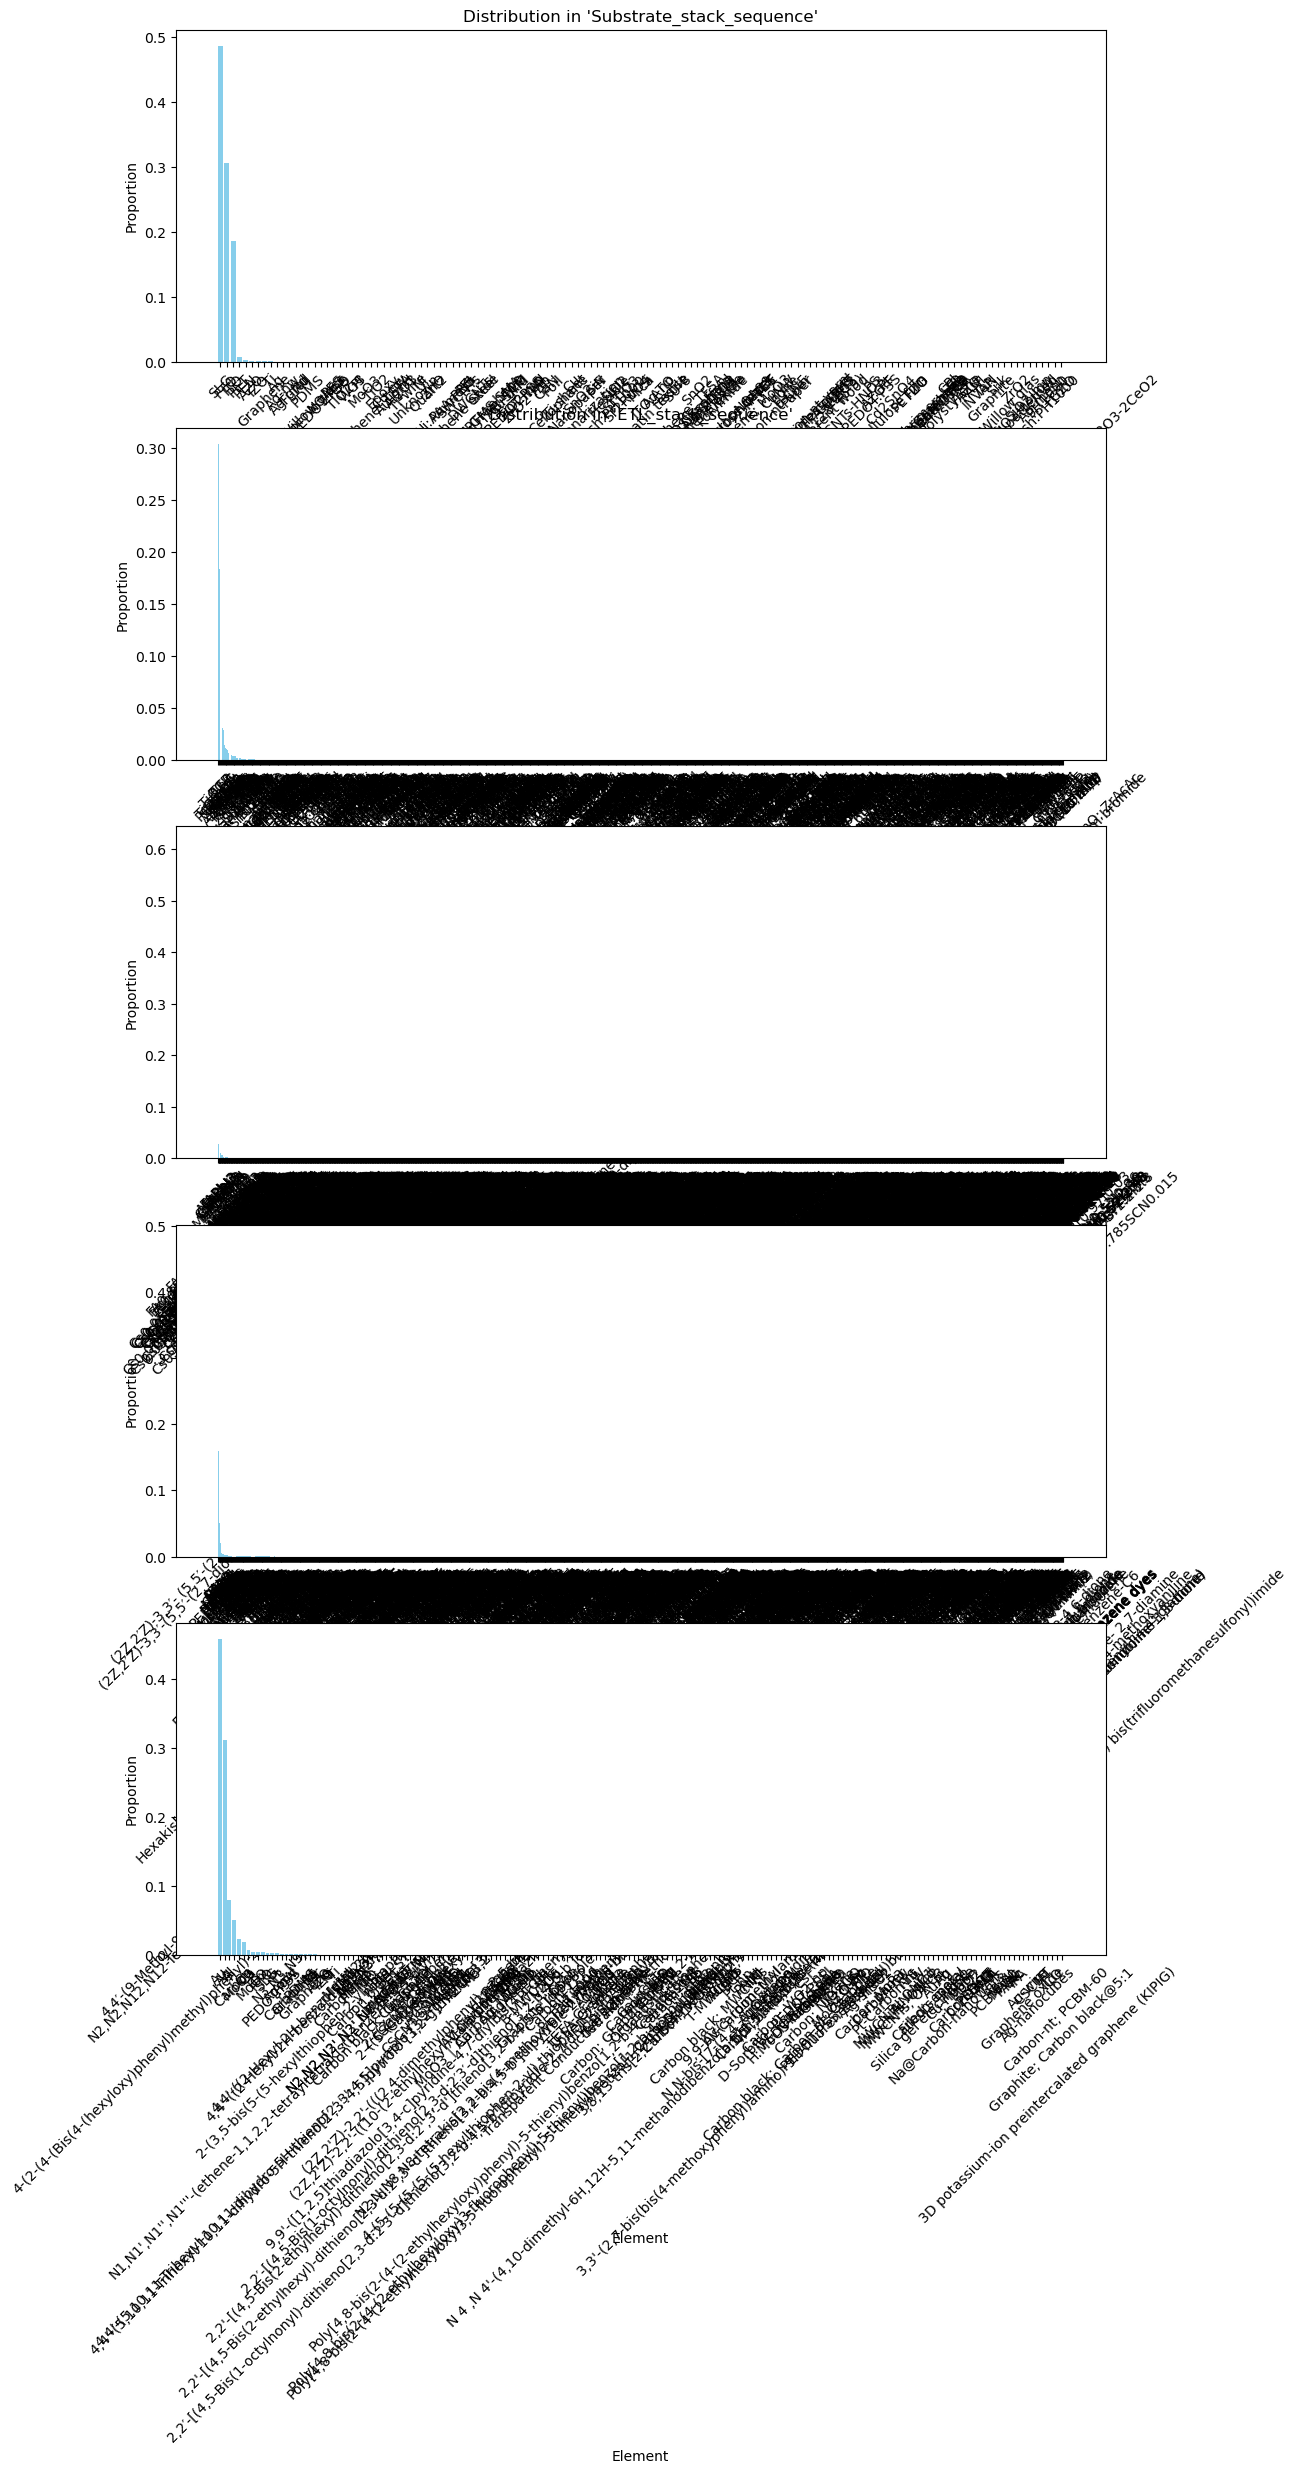

In [1]:
#!/usr/bin/env python
import pandas as pd
import matplotlib.pyplot as plt

def get_distribution(series, delimiter='|'):
    """
    Computes the frequency distribution (as proportions) for a pandas Series.
    If a cell contains the delimiter, the function splits it into multiple tokens.
    """
    counts = {}
    # Drop missing values for safety
    for entry in series.dropna():
        # Check if the entry is a string and if the delimiter is present
        if isinstance(entry, str) and delimiter in entry:
            tokens = [token.strip() for token in entry.split(delimiter) if token.strip()]
        else:
            tokens = [str(entry).strip()]
        for token in tokens:
            counts[token] = counts.get(token, 0) + 1
    total = sum(counts.values())
    # Convert counts to proportions
    distribution = {k: v / total for k, v in counts.items()}
    return distribution

def plot_distribution(distribution, title, ax):
    """
    Plots a bar chart of the frequency distribution on the given axis.
    """
    # Sort tokens by proportion (highest first)
    sorted_items = sorted(distribution.items(), key=lambda x: x[1], reverse=True)
    tokens = [item[0] for item in sorted_items]
    proportions = [item[1] for item in sorted_items]
    
    ax.bar(tokens, proportions, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel("Element")
    ax.set_ylabel("Proportion")
    ax.tick_params(axis='x', rotation=45)

def main():
    # Load the CSV file
    csv_file = 'perovskite_database_query.csv'
    df = pd.read_csv(csv_file)
    
    # List of columns to analyze
    columns = [
        "Substrate_stack_sequence", 
        "ETL_stack_sequence", 
        "Perovskite_composition_long_form", 
        "HTL_stack_sequence", 
        "Backcontact_stack_sequence"
    ]
    
    # Create a subplot for each column (vertically stacked)
    ncols = len(columns)
    fig, axs = plt.subplots(ncols, 1, figsize=(12, 5 * ncols))
    
    # If only one axis is returned (for one column), make it a list for consistency.
    if ncols == 1:
        axs = [axs]
    
    for i, col in enumerate(columns):
        if col in df.columns:
            # Compute the distribution for the column
            distribution = get_distribution(df[col], delimiter='|')
            plot_distribution(distribution, f"Distribution in '{col}'", axs[i])
        else:
            axs[i].text(0.5, 0.5, f"Column '{col}' not found", ha='center', va='center', fontsize=14)
            axs[i].set_title(f"Distribution in '{col}'")
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/1028324252.py:61: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


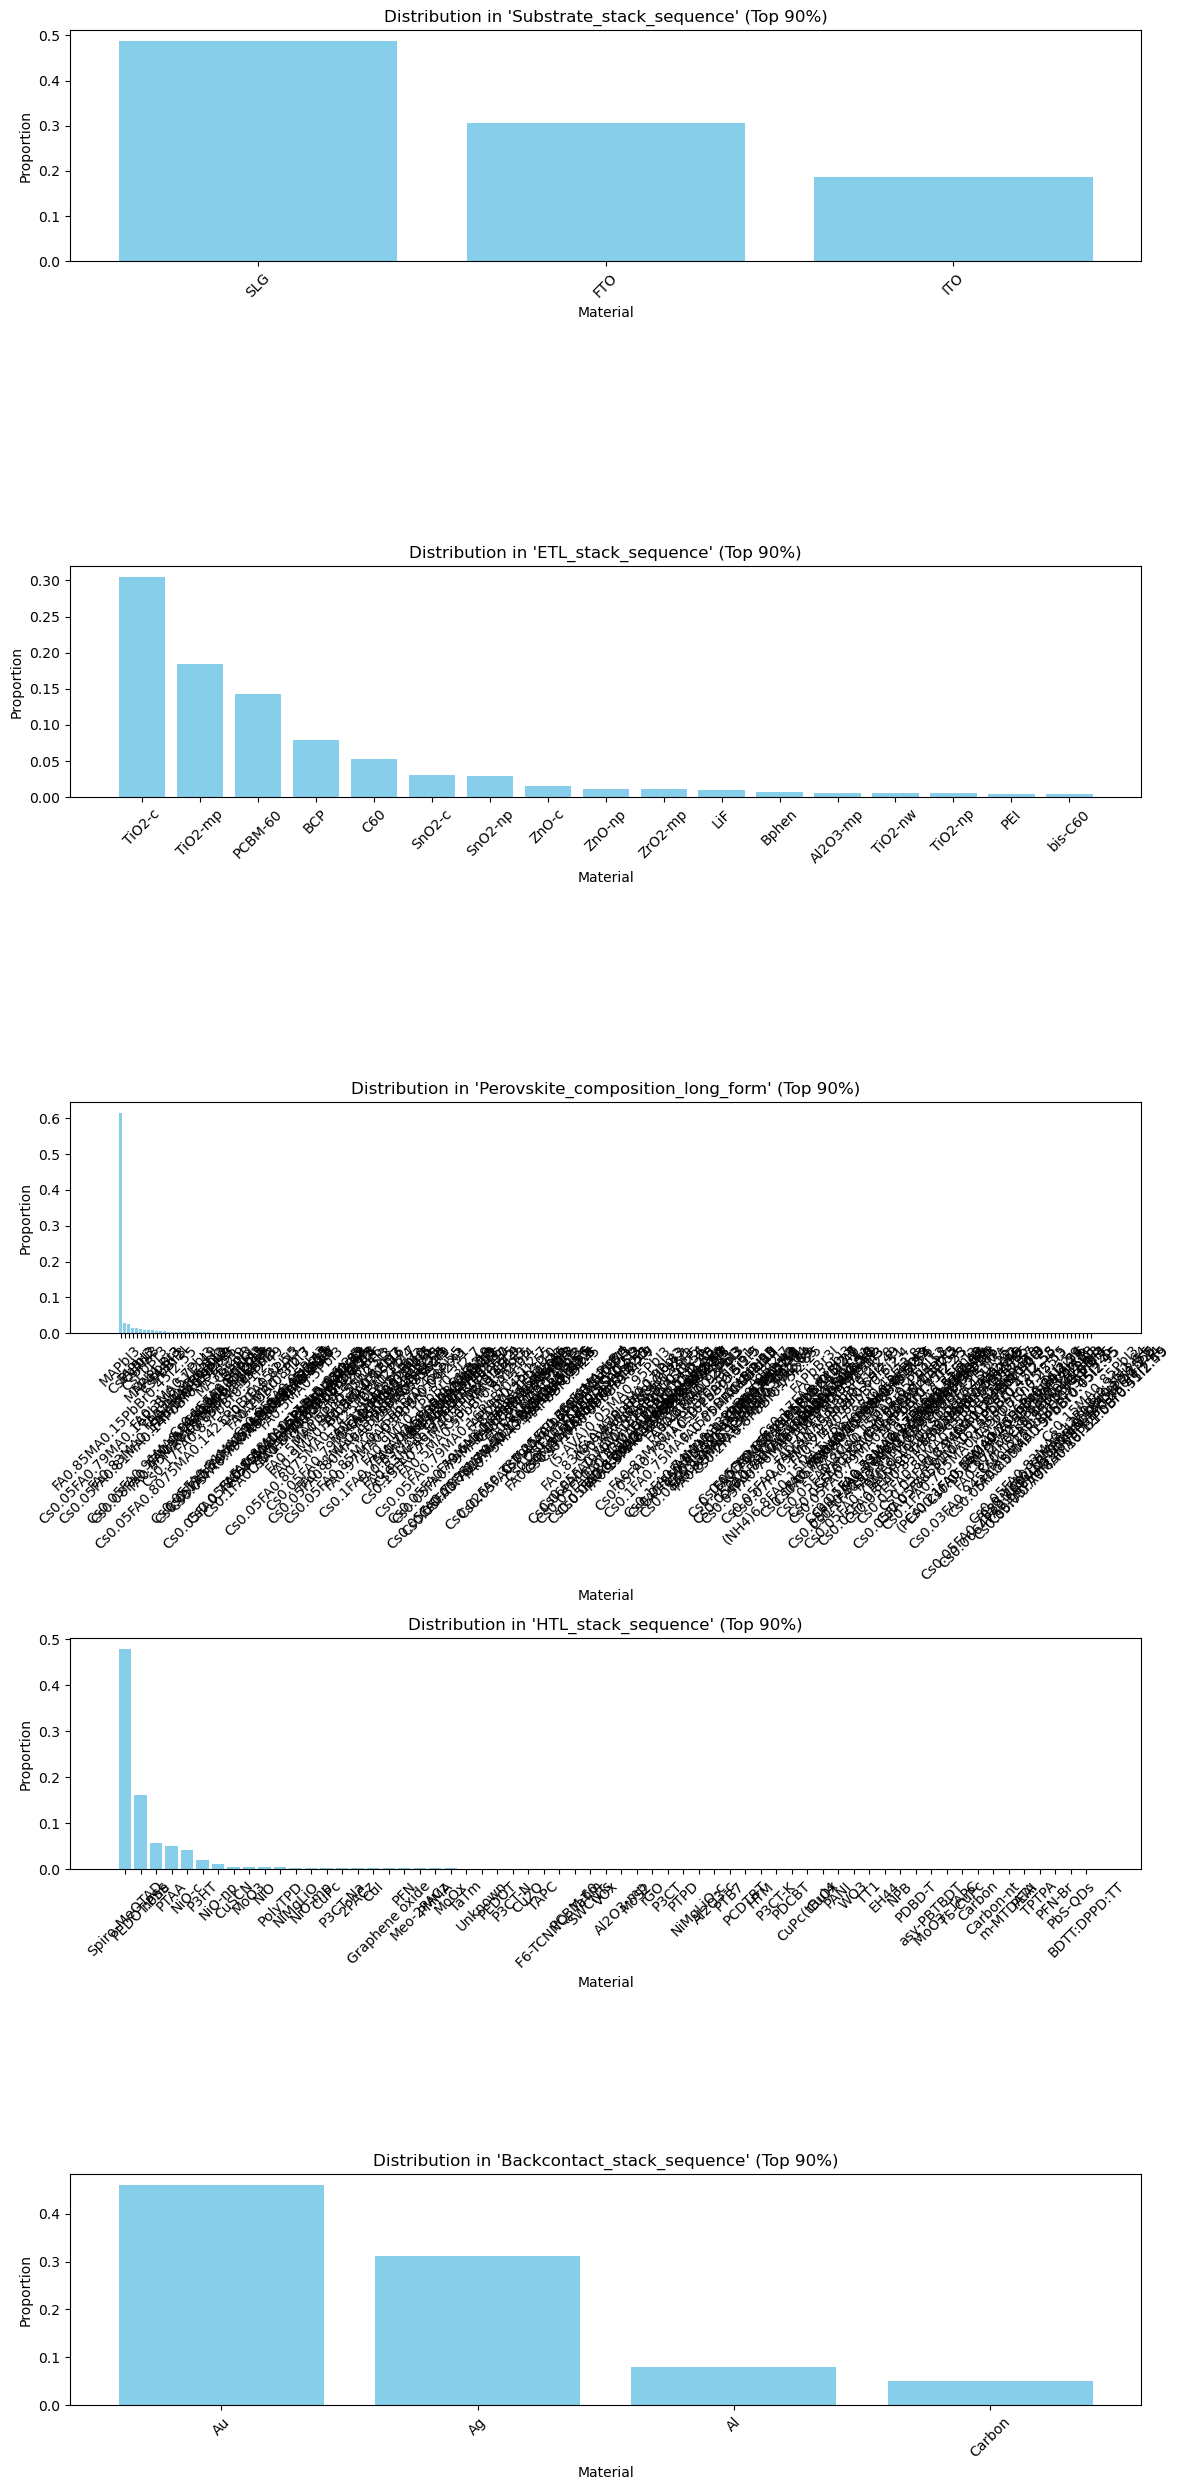

In [2]:
#!/usr/bin/env python
import pandas as pd
import matplotlib.pyplot as plt

def get_distribution(series, delimiter='|'):
    """
    Computes the frequency distribution (as proportions) for a pandas Series.
    If a cell contains the delimiter, the function splits it into multiple tokens.
    """
    counts = {}
    for entry in series.dropna():
        # Split the cell into tokens if the delimiter is present
        if isinstance(entry, str) and delimiter in entry:
            tokens = [token.strip() for token in entry.split(delimiter) if token.strip()]
        else:
            tokens = [str(entry).strip()]
        for token in tokens:
            counts[token] = counts.get(token, 0) + 1
    total = sum(counts.values())
    distribution = {k: v / total for k, v in counts.items()}
    return distribution

def filter_distribution(distribution, threshold=0.9):
    """
    Filters the distribution so that only the tokens that cumulatively account for
    at least `threshold` (default 80%) of the total frequency are returned.
    """
    # Sort tokens by descending proportion
    sorted_items = sorted(distribution.items(), key=lambda x: x[1], reverse=True)
    cumulative = 0
    filtered = {}
    for token, prop in sorted_items:
        filtered[token] = prop
        cumulative += prop
        if cumulative >= threshold:
            break
    return filtered

def plot_distribution(distribution, title, ax, threshold=0.9):
    """
    Plots a bar chart of the frequency distribution (filtered to include only the top
    tokens accounting for at least `threshold` of the total frequency) on the given axis.
    """
    # Filter the distribution to only include tokens that account for 80%
    filtered_distribution = filter_distribution(distribution, threshold)
    
    # Sort the filtered items for plotting
    sorted_items = sorted(filtered_distribution.items(), key=lambda x: x[1], reverse=True)
    tokens = [item[0] for item in sorted_items]
    proportions = [item[1] for item in sorted_items]
    
    ax.bar(tokens, proportions, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel("Material")
    ax.set_ylabel("Proportion")
    ax.tick_params(axis='x', rotation=45)

def main():
    # Load the CSV file
    csv_file = 'perovskite_database_query.csv'
    df = pd.read_csv(csv_file)
    
    # List of columns to analyze
    columns = [
        "Substrate_stack_sequence", 
        "ETL_stack_sequence", 
        "Perovskite_composition_long_form", 
        "HTL_stack_sequence", 
        "Backcontact_stack_sequence"
    ]
    
    # Create a subplot for each column
    ncols = len(columns)
    fig, axs = plt.subplots(ncols, 1, figsize=(12, 5 * ncols))
    
    # Ensure axs is iterable even if there is only one subplot
    if ncols == 1:
        axs = [axs]
    
    for i, col in enumerate(columns):
        if col in df.columns:
            # Compute the overall distribution for the column
            distribution = get_distribution(df[col], delimiter='|')
            plot_distribution(distribution, f"Distribution in '{col}' (Top 90%)", axs[i], threshold=0.9)
        else:
            axs[i].text(0.5, 0.5, f"Column '{col}' not found", ha='center', va='center', fontsize=14)
            axs[i].set_title(f"Distribution in '{col}'")
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/1556800224.py:61: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


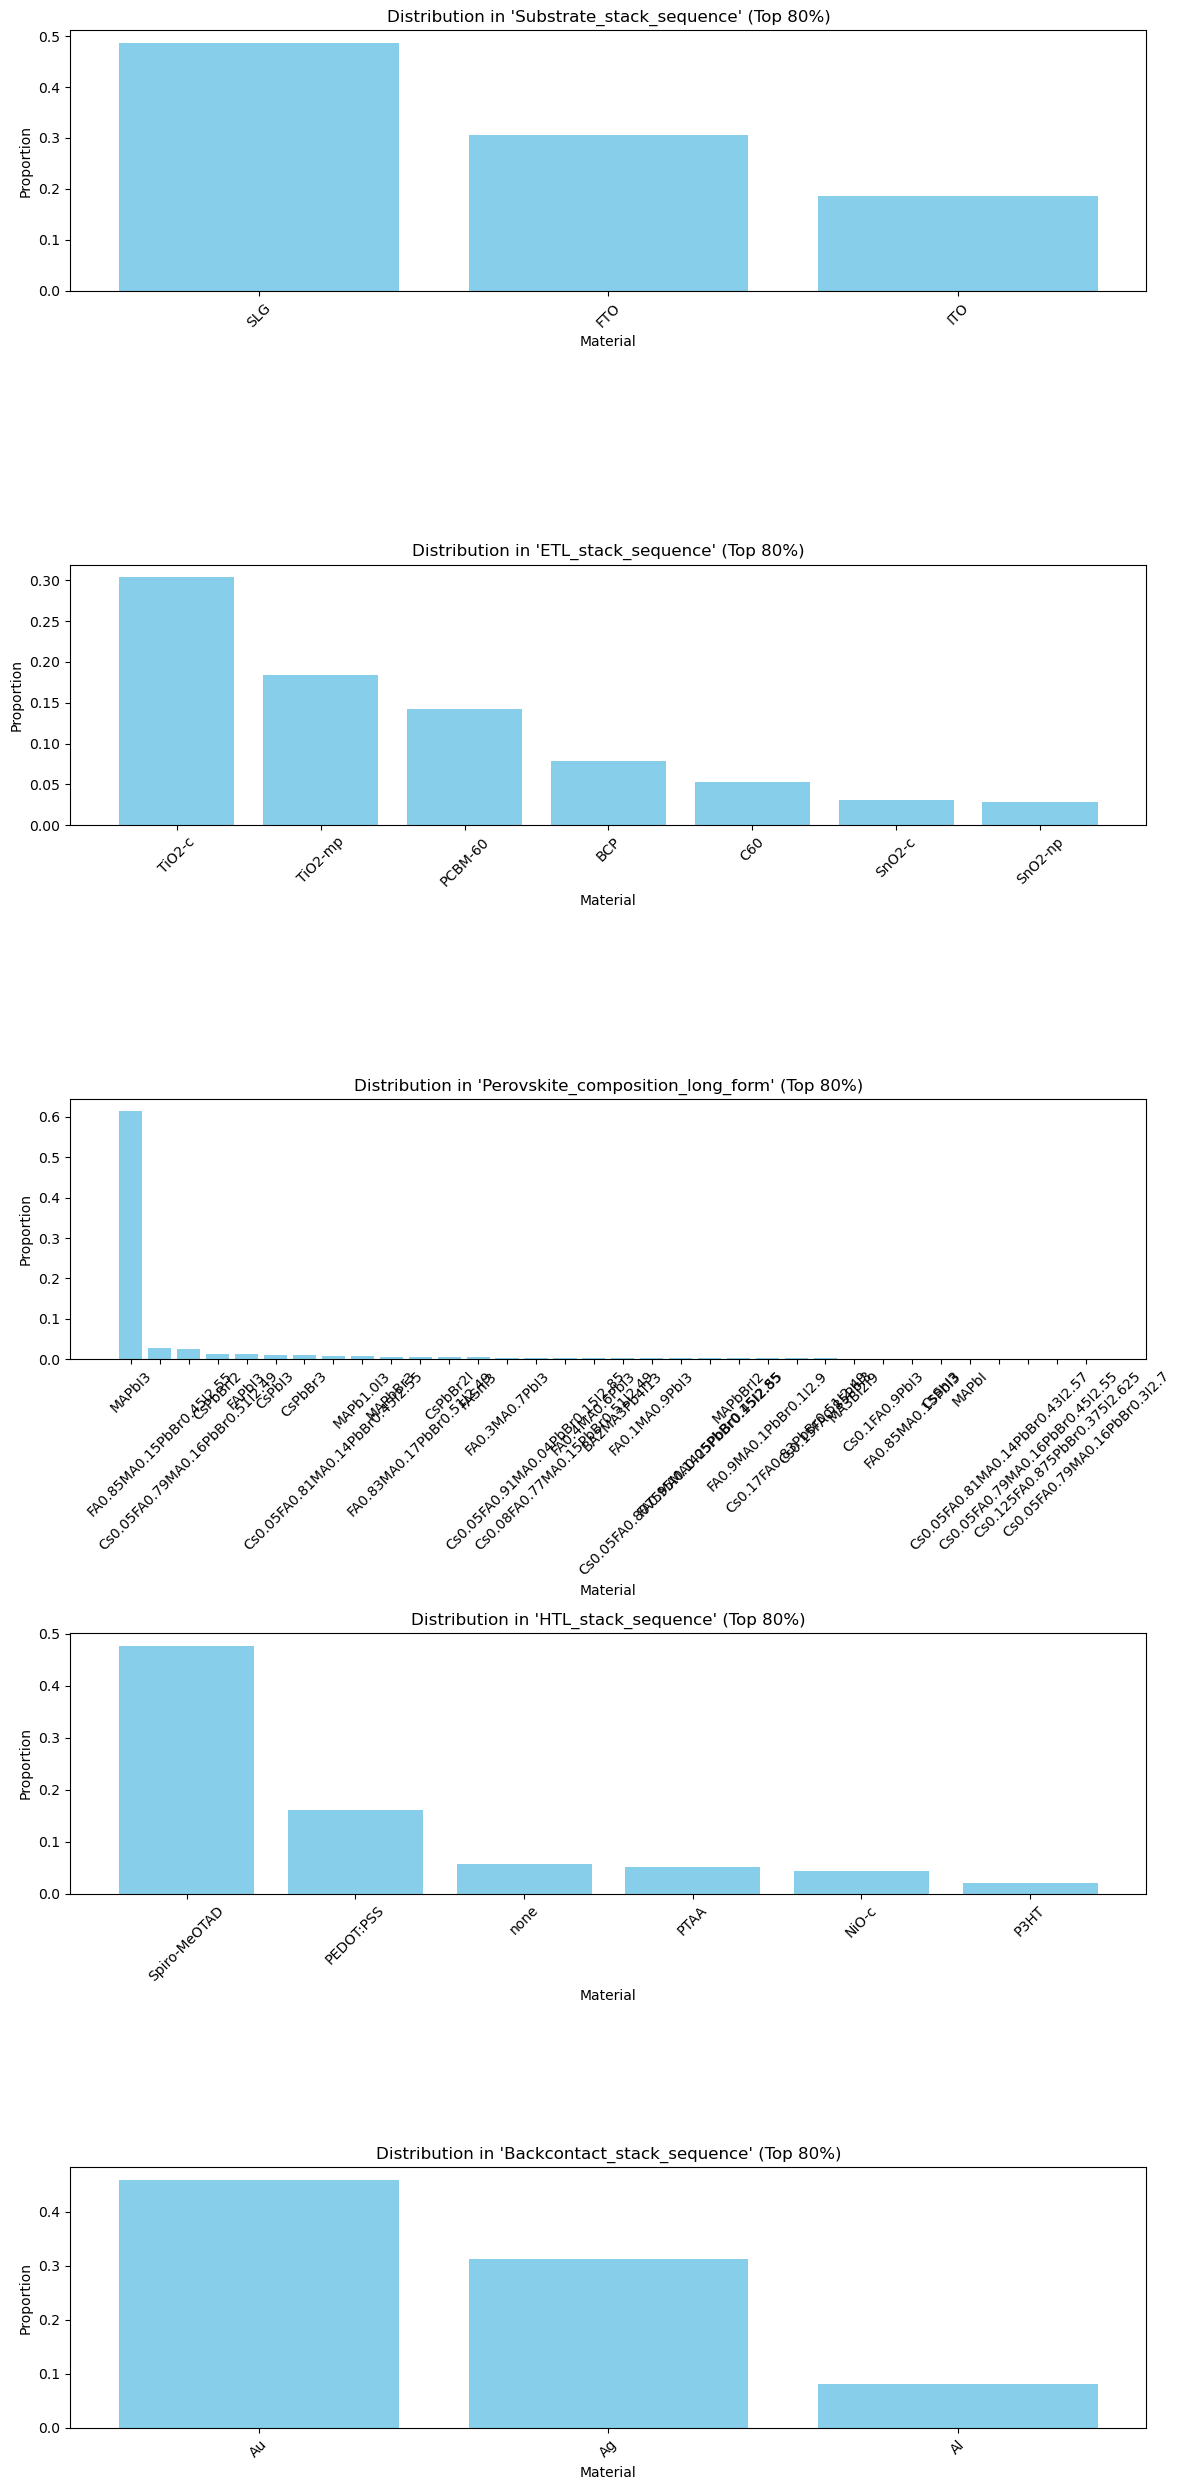

In [3]:
#!/usr/bin/env python
import pandas as pd
import matplotlib.pyplot as plt

def get_distribution(series, delimiter='|'):
    """
    Computes the frequency distribution (as proportions) for a pandas Series.
    If a cell contains the delimiter, the function splits it into multiple tokens.
    """
    counts = {}
    for entry in series.dropna():
        # Split the cell into tokens if the delimiter is present
        if isinstance(entry, str) and delimiter in entry:
            tokens = [token.strip() for token in entry.split(delimiter) if token.strip()]
        else:
            tokens = [str(entry).strip()]
        for token in tokens:
            counts[token] = counts.get(token, 0) + 1
    total = sum(counts.values())
    distribution = {k: v / total for k, v in counts.items()}
    return distribution

def filter_distribution(distribution, threshold=0.8):
    """
    Filters the distribution so that only the tokens that cumulatively account for
    at least `threshold` (default 80%) of the total frequency are returned.
    """
    # Sort tokens by descending proportion
    sorted_items = sorted(distribution.items(), key=lambda x: x[1], reverse=True)
    cumulative = 0
    filtered = {}
    for token, prop in sorted_items:
        filtered[token] = prop
        cumulative += prop
        if cumulative >= threshold:
            break
    return filtered

def plot_distribution(distribution, title, ax, threshold=0.8):
    """
    Plots a bar chart of the frequency distribution (filtered to include only the top
    tokens accounting for at least `threshold` of the total frequency) on the given axis.
    """
    # Filter the distribution to only include tokens that account for 80%
    filtered_distribution = filter_distribution(distribution, threshold)
    
    # Sort the filtered items for plotting
    sorted_items = sorted(filtered_distribution.items(), key=lambda x: x[1], reverse=True)
    tokens = [item[0] for item in sorted_items]
    proportions = [item[1] for item in sorted_items]
    
    ax.bar(tokens, proportions, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel("Material")
    ax.set_ylabel("Proportion")
    ax.tick_params(axis='x', rotation=45)

def main():
    # Load the CSV file
    csv_file = 'perovskite_database_query.csv'
    df = pd.read_csv(csv_file)
    
    # List of columns to analyze
    columns = [
        "Substrate_stack_sequence", 
        "ETL_stack_sequence", 
        "Perovskite_composition_long_form", 
        "HTL_stack_sequence", 
        "Backcontact_stack_sequence"
    ]
    
    # Create a subplot for each column
    ncols = len(columns)
    fig, axs = plt.subplots(ncols, 1, figsize=(12, 5 * ncols))
    
    # Ensure axs is iterable even if there is only one subplot
    if ncols == 1:
        axs = [axs]
    
    for i, col in enumerate(columns):
        if col in df.columns:
            # Compute the overall distribution for the column
            distribution = get_distribution(df[col], delimiter='|')
            plot_distribution(distribution, f"Distribution in '{col}' (Top 80%)", axs[i], threshold=0.8)
        else:
            axs[i].text(0.5, 0.5, f"Column '{col}' not found", ha='center', va='center', fontsize=14)
            axs[i].set_title(f"Distribution in '{col}'")
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/3298450010.py:61: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/3298450010.py:89: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


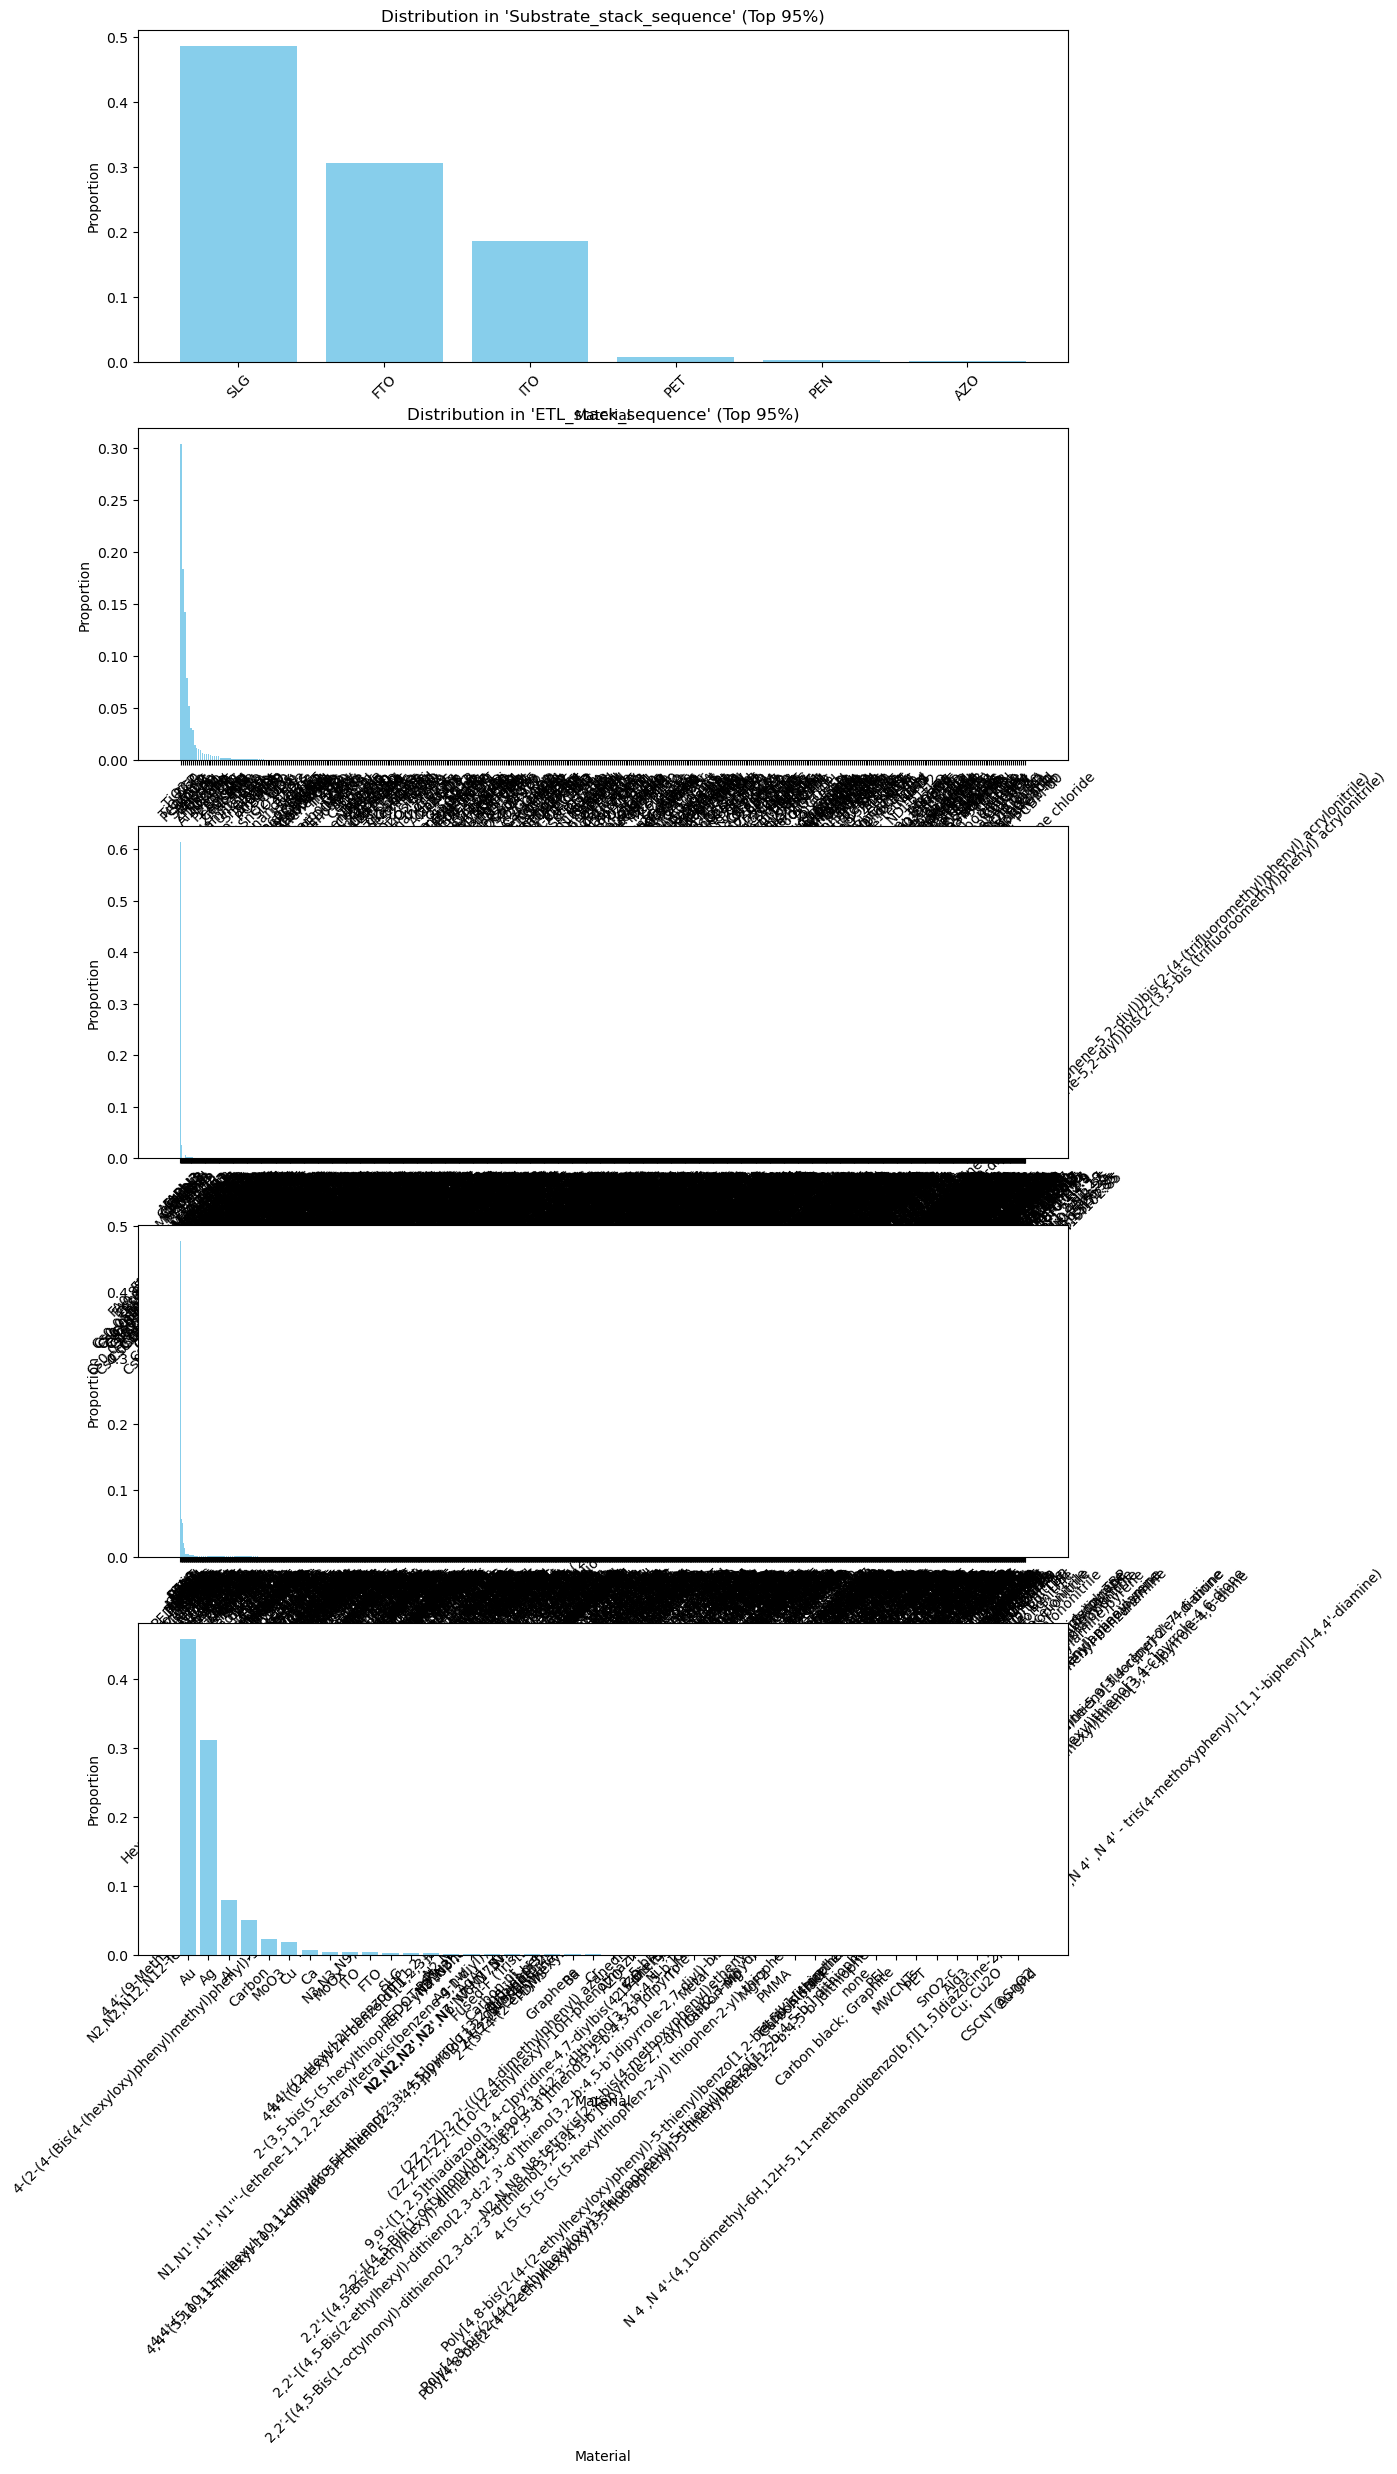

In [4]:
#!/usr/bin/env python
import pandas as pd
import matplotlib.pyplot as plt

def get_distribution(series, delimiter='|'):
    """
    Computes the frequency distribution (as proportions) for a pandas Series.
    If a cell contains the delimiter, the function splits it into multiple tokens.
    """
    counts = {}
    for entry in series.dropna():
        # Split the cell into tokens if the delimiter is present
        if isinstance(entry, str) and delimiter in entry:
            tokens = [token.strip() for token in entry.split(delimiter) if token.strip()]
        else:
            tokens = [str(entry).strip()]
        for token in tokens:
            counts[token] = counts.get(token, 0) + 1
    total = sum(counts.values())
    distribution = {k: v / total for k, v in counts.items()}
    return distribution

def filter_distribution(distribution, threshold=0.99):
    """
    Filters the distribution so that only the tokens that cumulatively account for
    at least `threshold` (default 80%) of the total frequency are returned.
    """
    # Sort tokens by descending proportion
    sorted_items = sorted(distribution.items(), key=lambda x: x[1], reverse=True)
    cumulative = 0
    filtered = {}
    for token, prop in sorted_items:
        filtered[token] = prop
        cumulative += prop
        if cumulative >= threshold:
            break
    return filtered

def plot_distribution(distribution, title, ax, threshold=0.99):
    """
    Plots a bar chart of the frequency distribution (filtered to include only the top
    tokens accounting for at least `threshold` of the total frequency) on the given axis.
    """
    # Filter the distribution to only include tokens that account for 80%
    filtered_distribution = filter_distribution(distribution, threshold)
    
    # Sort the filtered items for plotting
    sorted_items = sorted(filtered_distribution.items(), key=lambda x: x[1], reverse=True)
    tokens = [item[0] for item in sorted_items]
    proportions = [item[1] for item in sorted_items]
    
    ax.bar(tokens, proportions, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel("Material")
    ax.set_ylabel("Proportion")
    ax.tick_params(axis='x', rotation=45)

def main():
    # Load the CSV file
    csv_file = 'perovskite_database_query.csv'
    df = pd.read_csv(csv_file)
    
    # List of columns to analyze
    columns = [
        "Substrate_stack_sequence", 
        "ETL_stack_sequence", 
        "Perovskite_composition_long_form", 
        "HTL_stack_sequence", 
        "Backcontact_stack_sequence"
    ]
    
    # Create a subplot for each column
    ncols = len(columns)
    fig, axs = plt.subplots(ncols, 1, figsize=(12, 5 * ncols))
    
    # Ensure axs is iterable even if there is only one subplot
    if ncols == 1:
        axs = [axs]
    
    for i, col in enumerate(columns):
        if col in df.columns:
            # Compute the overall distribution for the column
            distribution = get_distribution(df[col], delimiter='|')
            plot_distribution(distribution, f"Distribution in '{col}' (Top 95%)", axs[i], threshold=0.99)
        else:
            axs[i].text(0.5, 0.5, f"Column '{col}' not found", ha='center', va='center', fontsize=14)
            axs[i].set_title(f"Distribution in '{col}'")
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2383915802.py:8: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2383915802.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Material', y='Proportion', palette='viridis', ax=ax)
/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2383915802.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ti

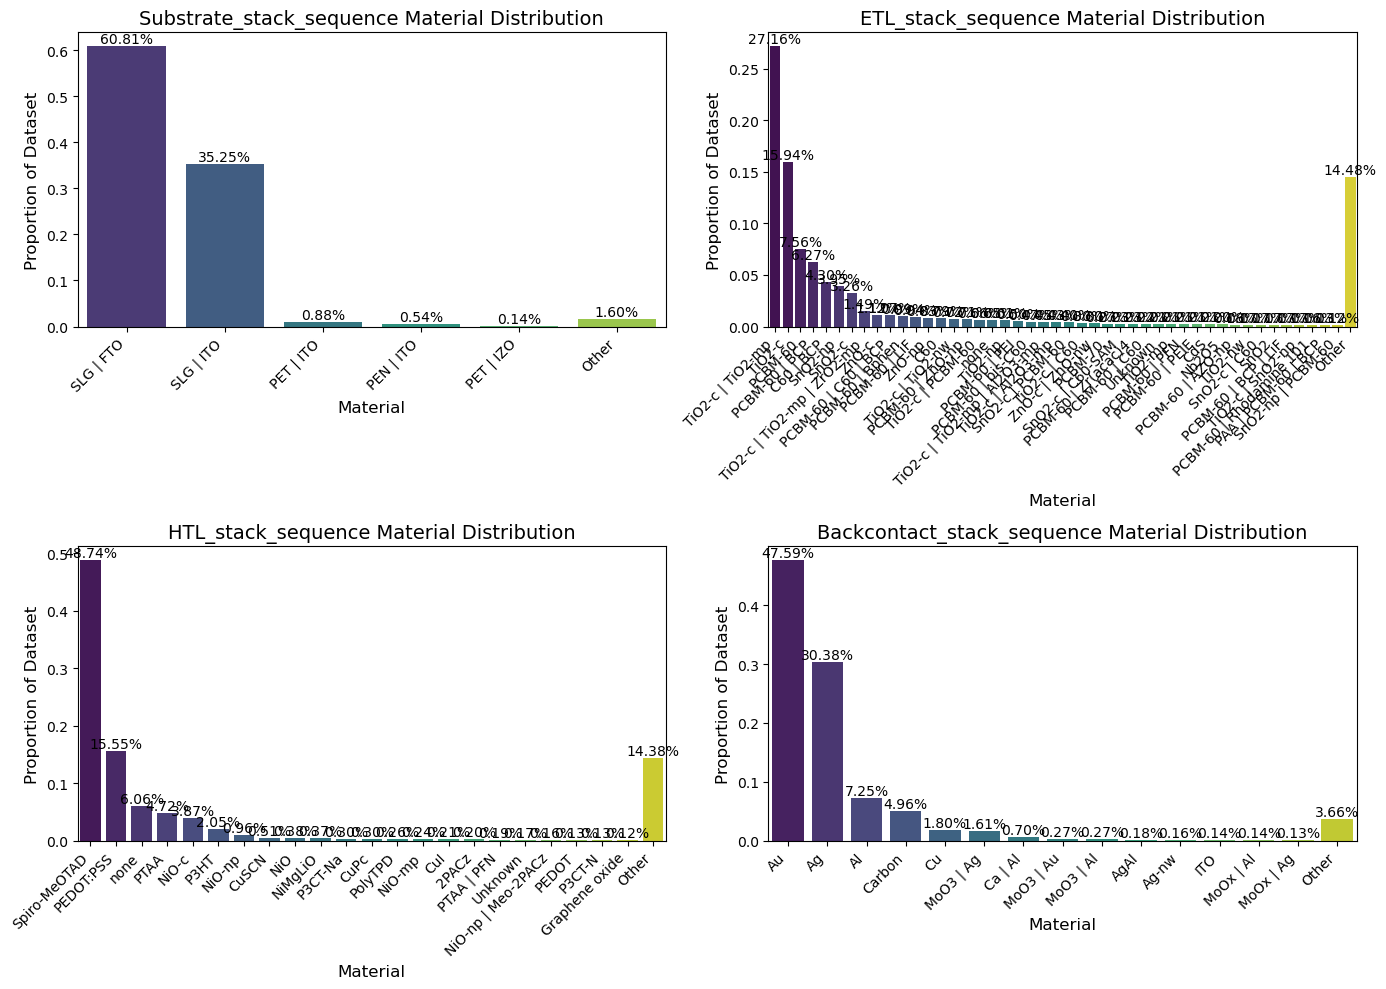

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the layers to analyze
columns = ['Substrate_stack_sequence', 'ETL_stack_sequence', 'HTL_stack_sequence', 'Backcontact_stack_sequence']
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)
    
# Total number of rows in the dataset
total_rows = len(df)

# Threshold for grouping infrequent materials into "Other"
threshold = 50 / total_rows  # Convert threshold count to proportion

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Loop through each layer and create a bar chart
for ax, col in zip(axes.flatten(), columns):
    # Count occurrences of each unique material
    value_counts = df[col].value_counts()
    
    # Normalize counts to get proportions
    value_counts_normalized = value_counts / total_rows
    
    # Identify less frequent materials to group into "Other"
    top_values = value_counts_normalized[value_counts_normalized >= threshold]
    other_proportion = value_counts_normalized[value_counts_normalized < threshold].sum()

    # Create final dataset for plotting
    plot_data = top_values.copy()
    if other_proportion > 0:
        plot_data['Other'] = other_proportion

    # Convert to DataFrame for seaborn
    plot_df = plot_data.reset_index()
    plot_df.columns = ['Material', 'Proportion']

    # Bar plot
    sns.barplot(data=plot_df, x='Material', y='Proportion', palette='viridis', ax=ax)

    # Labels and titles
    ax.set_title(f'{col} Material Distribution', fontsize=14)
    ax.set_xlabel('Material', fontsize=12)
    ax.set_ylabel('Proportion of Dataset', fontsize=12)

    # Rotate x-axis labels for readability
    ax.set_xticklabels(plot_df['Material'], rotation=45, ha='right')

    # Add proportion values above bars
    for index, row in plot_df.iterrows():
        ax.text(index, row['Proportion'], f"{row['Proportion']:.2%}", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/4075321702.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x=col, y='proportion', palette='viridis')


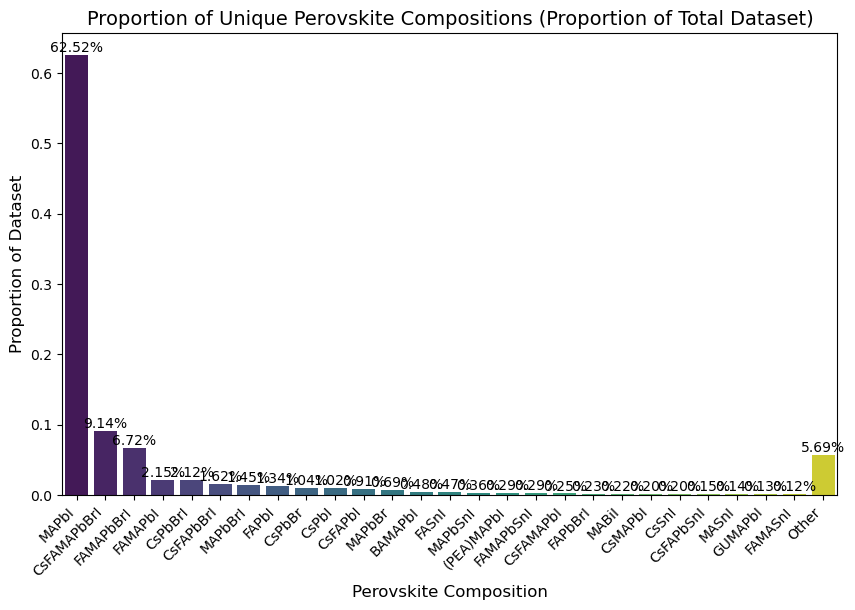

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the column
col = 'Perovskite_composition_short_form'
# col = 'Perovskite_composition_long_form'

# Count occurrences of each unique value
value_counts = df[col].value_counts()

# Total count of the dataset
total_count = len(df)

# Normalize the counts to get proportions of the whole dataset
value_counts_normalized = value_counts / total_count

# Identify multi-layered perovskites (assumed to have '|')
multi_layer_mask = value_counts.index.str.contains(r'\|', regex=True)
multi_layered_sum = value_counts_normalized[multi_layer_mask].sum()

# Group less frequent single-layer compositions under "Other"
threshold = 50 / total_count  # Convert threshold count to proportion
top_values = value_counts_normalized[(value_counts_normalized >= threshold) & (~multi_layer_mask)]

# Aggregate "Other" compositions
other_proportion = value_counts_normalized[(value_counts_normalized < threshold) & (~multi_layer_mask)].sum()

# Create the final dataset for plotting
value_counts_filtered = top_values.copy()

# Add "Other" if there are compositions below the threshold
if other_proportion > 0 or multi_layered_sum > 0:
    value_counts_filtered['Other'] = other_proportion + multi_layered_sum

# Prepare the data for plotting
plot_data = value_counts_filtered.reset_index()
plot_data.columns = [col, 'proportion']

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_data, x=col, y='proportion', palette='viridis')

# Add title and labels
plt.title('Proportion of Unique Perovskite Compositions (Proportion of Total Dataset)', fontsize=14)
plt.xlabel('Perovskite Composition', fontsize=12)
plt.ylabel('Proportion of Dataset', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add proportion values on top of the bars
for index, row in plot_data.iterrows():
    ax.text(index, row['proportion'], f"{row['proportion']:.2%}", ha='center', va='bottom')

# Show the plot
plt.show()

/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2286188686.py:15: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Materials in column 'Substrate_stack_sequence' with proportion >= 4.99%:
Substrate_stack_sequence
SLG | FTO    0.608125
SLG | ITO    0.352529
Name: count, dtype: float64

Materials in column 'ETL_stack_sequence' with proportion >= 4.99%:
ETL_stack_sequence
TiO2-c | TiO2-mp    0.271604
TiO2-c              0.159430
PCBM-60             0.075620
PCBM-60 | BCP       0.062683
Name: count, dtype: float64

Materials in column 'HTL_stack_sequence' with proportion >= 4.99%:
HTL_stack_sequence
Spiro-MeOTAD    0.487412
PEDOT:PSS       0.155498
none            0.060566
Name: count, dtype: float64

Materials in column 'Backcontact_stack_sequence' with proportion >= 4.99%:
Backcontact_stack_sequence
Au    0.475895
Ag    0.303807
Al    0.072456
Name: count, dtype: float64



/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2286188686.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Material', y='Proportion', palette='viridis', ax=ax)
/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2286188686.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(plot_df['Material'], rotation=45, ha='right')
/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2286188686.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Material', y='Proportion', palette='viridis', ax=ax)
/var/folders/j3/pj3kpj

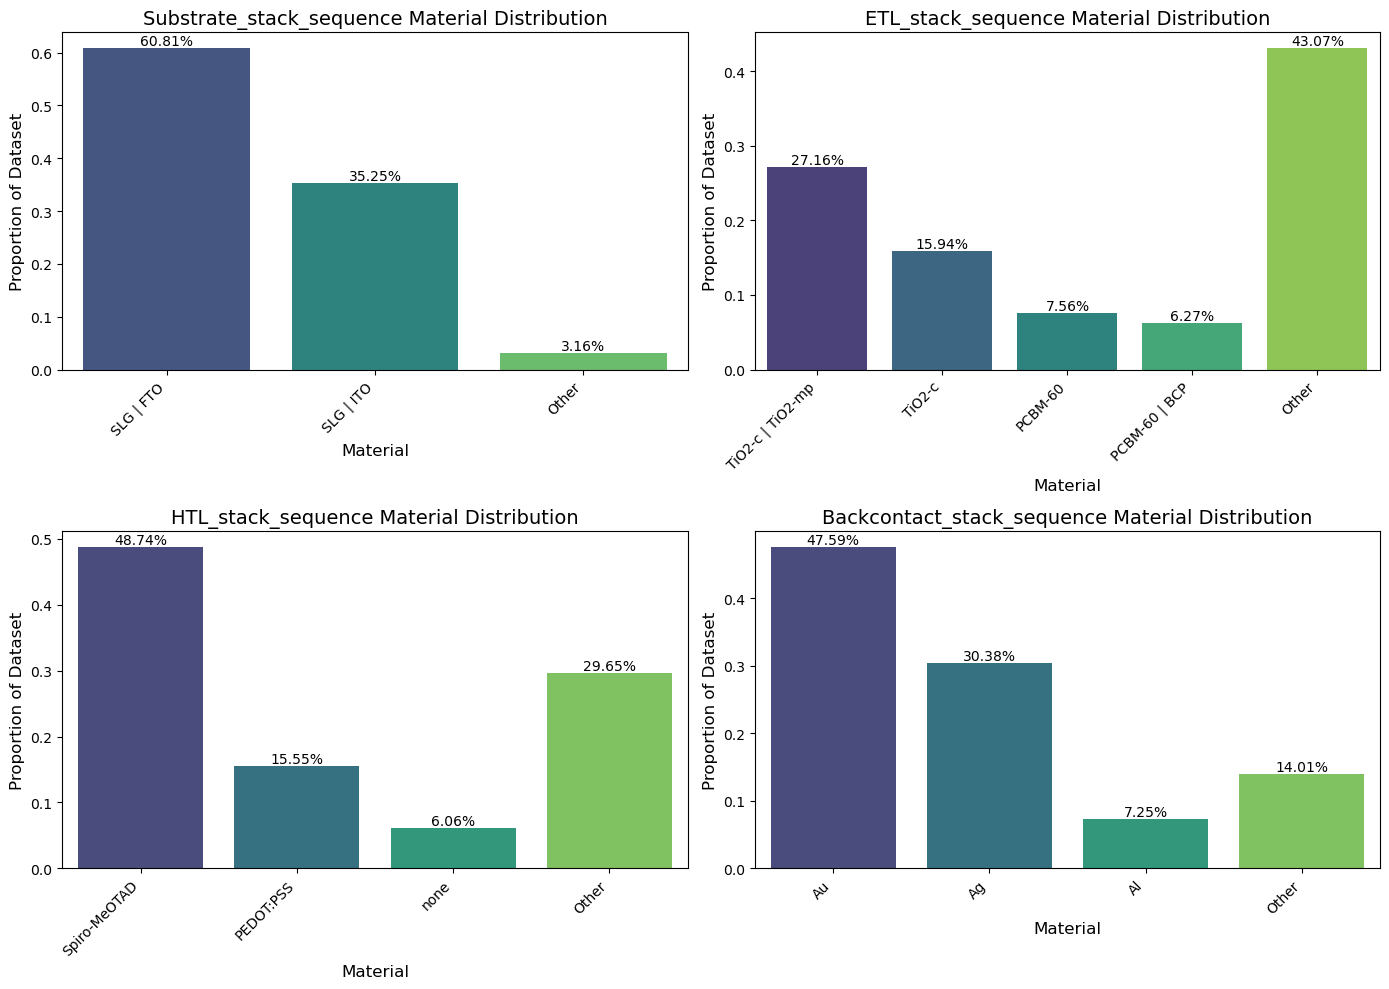

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the columns to analyze
columns = [
    'Substrate_stack_sequence', 
    'ETL_stack_sequence', 
    'HTL_stack_sequence', 
    'Backcontact_stack_sequence'
]

# Load the CSV file
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)
    
# Total number of rows in the dataset
total_rows = len(df)

# Set threshold: materials must have a proportion >= 4.99% (0.0499)
threshold = 0.0499

# Create subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each column and create a bar chart
for ax, col in zip(axes.flatten(), columns):
    # Count occurrences of each unique material
    value_counts = df[col].value_counts()
    
    # Normalize counts to get proportions
    value_counts_normalized = value_counts / total_rows
    
    # Identify materials with a proportion >= threshold
    top_values = value_counts_normalized[value_counts_normalized >= threshold]
    other_proportion = value_counts_normalized[value_counts_normalized < threshold].sum()

    # Print out the materials meeting the threshold for this column
    print(f"Materials in column '{col}' with proportion >= 4.99%:")
    print(top_values)
    print()  # Empty line for readability
    
    # Create final dataset for plotting
    plot_data = top_values.copy()
    if other_proportion > 0:
        plot_data['Other'] = other_proportion

    # Convert to DataFrame for seaborn
    plot_df = plot_data.reset_index()
    plot_df.columns = ['Material', 'Proportion']

    # Create the bar plot
    sns.barplot(data=plot_df, x='Material', y='Proportion', palette='viridis', ax=ax)

    # Set labels and titles
    ax.set_title(f'{col} Material Distribution', fontsize=14)
    ax.set_xlabel('Material', fontsize=12)
    ax.set_ylabel('Proportion of Dataset', fontsize=12)

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(plot_df['Material'], rotation=45, ha='right')

    # Add proportion values above bars
    for index, row in plot_df.iterrows():
        ax.text(index, row['Proportion'], f"{row['Proportion']:.2%}", ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Define the allowed materials for each column based on your analysis:
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"]
}

# List of columns to include in the simplified cell stack CSV
chosen_columns = [
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',  # We assume this column remains unfiltered.
    'HTL_stack_sequence',
    'Backcontact_stack_sequence',
]

# Read the original CSV file
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Filter the DataFrame row by row:
# For each column (except Perovskite_composition_long_form), keep only rows
# where the value is in the allowed list.
filtered_df = df[
    df['Substrate_stack_sequence'].isin(allowed_materials['Substrate_stack_sequence']) &
    df['ETL_stack_sequence'].isin(allowed_materials['ETL_stack_sequence']) &
    df['HTL_stack_sequence'].isin(allowed_materials['HTL_stack_sequence']) &
    df['Backcontact_stack_sequence'].isin(allowed_materials['Backcontact_stack_sequence'])
]

# Optionally, keep only the chosen columns for the simplified cell stack structure.
filtered_df = filtered_df[chosen_columns]

# Write the filtered DataFrame to a new CSV file
output_csv = 'simplified_cell_stacks.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_23460/3187756713.py:22: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Filtered CSV file 'simplified_cell_stacks.csv' created with 14909 rows.


In [9]:
import pandas as pd

# Define the allowed materials for each column based on your analysis:
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"],
    'Perovskite_composition_a_ions': ["MA", "FA", "Cs"],
    'Perovskite_composition_b_ions': ["Pb"],
    'Perovskite_composition_c_ions': ["Br", "I"]
}

# List of columns to include in the simplified cell stack CSV
chosen_columns = [
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',  # We assume this column remains unfiltered.
    'HTL_stack_sequence',
    'Backcontact_stack_sequence',
    'Perovskite_composition_a_ions',
    'Perovskite_composition_b_ions',
    'Perovskite_composition_c_ions'
]

# Read the original CSV file
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Filter the DataFrame row by row:
# For each column, keep only rows where the value is in the allowed list and does not contain "|".
filtered_df = df[
    ~df['Substrate_stack_sequence'].str.contains('|', na=False) &
    ~df['ETL_stack_sequence'].str.contains('|', na=False) &
    ~df['HTL_stack_sequence'].str.contains('|', na=False) &
    ~df['Backcontact_stack_sequence'].str.contains('|', na=False) &
    df['Perovskite_composition_a_ions'].isin(allowed_materials['Perovskite_composition_a_ions']) &
    df['Perovskite_composition_b_ions'].isin(allowed_materials['Perovskite_composition_b_ions']) &
    df['Perovskite_composition_c_ions'].isin(allowed_materials['Perovskite_composition_c_ions'])
]

# Optionally, keep only the chosen columns for the simplified cell stack structure.
filtered_df = filtered_df[chosen_columns]

# Write the filtered DataFrame to a new CSV file
output_csv = 'simplified_cell_stacks_filtered.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")

print(df['Perovskite_composition_a_ions'])


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2384978779.py:28: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Filtered CSV file 'simplified_cell_stacks_filtered.csv' created with 0 rows.
0                Cs
1                Cs
2                Cs
3                Cs
4                Cs
            ...    
42973    Cs; FA; MA
42974    Cs; FA; MA
42975    Cs; FA; MA
42976    Cs; FA; MA
42977    Cs; FA; MA
Name: Perovskite_composition_a_ions, Length: 42978, dtype: object


In [10]:
import pandas as pd

# Define the allowed materials for filtering
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"],
    'Perovskite_composition_a_ions': ["MA", "FA", "Cs"],  # Any of these must be present
    'Perovskite_composition_b_ions': ["Pb"],  # Must contain Pb
    'Perovskite_composition_c_ions': ["Br", "I"]  # Must contain Br or I
}

# List of relevant columns
chosen_columns = [
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',  # Keep long-form composition
    'HTL_stack_sequence',
    'Backcontact_stack_sequence',
    'Perovskite_composition_a_ions',
    'Perovskite_composition_b_ions',
    'Perovskite_composition_c_ions'
]

# Read dataset
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Function to check if at least one allowed value exists in a semicolon-separated string
def contains_any(value, allowed_list):
    if pd.isna(value):  # Handle NaN values safely
        return False
    items = {item.strip() for item in value.split(';')}  # Split and remove spaces
    return any(item in allowed_list for item in items)

# Apply filtering:
filtered_df = df[
    ~df['Substrate_stack_sequence'].str.contains(r'\|', na=False) &
    ~df['ETL_stack_sequence'].str.contains(r'\|', na=False) &
    ~df['HTL_stack_sequence'].str.contains(r'\|', na=False) &
    ~df['Backcontact_stack_sequence'].str.contains(r'\|', na=False) &
    df['Perovskite_composition_a_ions'].apply(lambda x: contains_any(x, allowed_materials['Perovskite_composition_a_ions'])) &
    df['Perovskite_composition_b_ions'].apply(lambda x: contains_any(x, allowed_materials['Perovskite_composition_b_ions'])) &
    df['Perovskite_composition_c_ions'].apply(lambda x: contains_any(x, allowed_materials['Perovskite_composition_c_ions']))
]

# Keep only the relevant columns
filtered_df = filtered_df[chosen_columns]

# Save the filtered dataset
output_csv = 'simplified_cell_stacks_filtered.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/2726025778.py:28: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Filtered CSV file 'simplified_cell_stacks_filtered.csv' created with 168 rows.


In [11]:
import pandas as pd

# Define the allowed materials for filtering
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"]
}

# List of relevant columns
chosen_columns = [
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',  # Keep long-form composition
    'HTL_stack_sequence',
    'Backcontact_stack_sequence',
    'Perovskite_composition_a_ions',
    'Perovskite_composition_b_ions',
    'Perovskite_composition_c_ions'
]

# Read dataset
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Function to check if a value contains "|"
def contains_pipe(value):
    if pd.isna(value):  # Handle NaN values safely
        return False
    return "|" in value

# Apply filtering:
filtered_df = df[
    df['Substrate_stack_sequence'].isin(allowed_materials['Substrate_stack_sequence']) &
    df['ETL_stack_sequence'].isin(allowed_materials['ETL_stack_sequence']) &
    df['HTL_stack_sequence'].isin(allowed_materials['HTL_stack_sequence']) &
    df['Backcontact_stack_sequence'].isin(allowed_materials['Backcontact_stack_sequence']) &
    ~df['Perovskite_composition_a_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_b_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_c_ions'].apply(contains_pipe)    # Exclude if contains "|"
]

# Keep only the relevant columns
filtered_df = filtered_df[chosen_columns]

# Save the filtered dataset
output_csv = 'simplified_cell_stacks_filtered.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_21583/3943959080.py:25: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Filtered CSV file 'simplified_cell_stacks_filtered.csv' created with 14827 rows.


In [2]:
import pandas as pd

# Define the allowed materials for filtering
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"]
}

# List of columns to **keep in the output**, including Ref_ID
output_columns = [
    'Ref_ID',                             # <--- ADDED THIS
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',   # Keep long-form composition
    'HTL_stack_sequence',
    'Backcontact_stack_sequence'
]

# Read dataset
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Function to check if a value contains "|"
def contains_pipe(value):
    if pd.isna(value):  # Handle NaN values safely
        return False
    return "|" in value

# Apply filtering:
filtered_df = df[
    df['Substrate_stack_sequence'].isin(allowed_materials['Substrate_stack_sequence']) &
    df['ETL_stack_sequence'].isin(allowed_materials['ETL_stack_sequence']) &
    df['HTL_stack_sequence'].isin(allowed_materials['HTL_stack_sequence']) &
    df['Backcontact_stack_sequence'].isin(allowed_materials['Backcontact_stack_sequence']) &
    ~df['Perovskite_composition_a_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_b_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_c_ions'].apply(contains_pipe)    # Exclude if contains "|"
]

# Intersect output_columns with columns that actually exist in the dataset
existing_cols = [col for col in output_columns if col in filtered_df.columns]

# Keep only those columns in the final output
filtered_df = filtered_df[existing_cols]

# Save the filtered dataset
output_csv = 'simplified_cell_stacks_filtered.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_23460/423132156.py:23: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Filtered CSV file 'simplified_cell_stacks_filtered.csv' created with 14827 rows.


In [2]:
import pandas as pd

# Define the allowed materials for filtering
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"]
}

# List of columns to **keep in the output**
output_columns = [
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',  # Keep long-form composition
    'HTL_stack_sequence',
    'Backcontact_stack_sequence'
]

# Read dataset
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Function to check if a value contains "|"
def contains_pipe(value):
    if pd.isna(value):  # Handle NaN values safely
        return False
    return "|" in value

# Apply filtering:
filtered_df = df[
    df['Substrate_stack_sequence'].isin(allowed_materials['Substrate_stack_sequence']) &
    df['ETL_stack_sequence'].isin(allowed_materials['ETL_stack_sequence']) &
    df['HTL_stack_sequence'].isin(allowed_materials['HTL_stack_sequence']) &
    df['Backcontact_stack_sequence'].isin(allowed_materials['Backcontact_stack_sequence']) &
    ~df['Perovskite_composition_a_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_b_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_c_ions'].apply(contains_pipe)    # Exclude if contains "|"
]

# Keep only the columns required for the final output
filtered_df = filtered_df[output_columns]

# Save the filtered dataset
output_csv = 'simplified_cell_stacks_filtered.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_78885/2328695103.py:22: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Filtered CSV file 'simplified_cell_stacks_filtered.csv' created with 14827 rows.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# import tensorflow as tf
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences


# Load the filtered dataset
csv_file = 'simplified_cell_stacks_filtered.csv'
df = pd.read_csv(csv_file)

# Combine columns into single sequences
df['cell_stack_sequence'] = df.apply(lambda row: 
    f"{row['Substrate_stack_sequence']} ; {row['ETL_stack_sequence']} ; {row['Perovskite_composition_long_form']} ; {row['HTL_stack_sequence']} ; {row['Backcontact_stack_sequence']}", axis=1
)

# Tokenize sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cell_stack_sequence'])
sequences = tokenizer.texts_to_sequences(df['cell_stack_sequence'])

# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences for uniform input size
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Prepare input and output pairs for training (predict next token in sequence)
X_train = sequences[:, :-1]  # All words except the last
y_train = sequences[:, -1]   # The last word in each sequence

# Convert y_train to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=vocab_size)

# Build LSTM-based sequence generation model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_sequence_length-1),
    LSTM(256, return_sequences=True),
    LSTM(256),
    Dense(256, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Save tokenizer and model
model.save('cell_stack_generator_model.h5')
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)

print("Model training complete and saved!")


Epoch 1/50


2025-02-06 10:25:41.987848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-06 10:25:41.988868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-06 10:25:41.989278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

464/464 [==============================] - 19s 38ms/step - loss: 0.1326 - accuracy: 0.9959
Epoch 2/50
464/464 [==============================] - 18s 39ms/step - loss: 0.0159 - accuracy: 0.9980
Epoch 3/50
464/464 [==============================] - 20s 42ms/step - loss: 0.0158 - accuracy: 0.9980
Epoch 4/50
464/464 [==============================] - 19s 41ms/step - loss: 0.0157 - accuracy: 0.9980
Epoch 5/50
464/464 [==============================] - 20s 42ms/step - loss: 0.0150 - accuracy: 0.9980
Epoch 6/50
464/464 [==============================] - 20s 43ms/step - loss: 0.0156 - accuracy: 0.9980
Epoch 7/50
464/464 [==============================] - 24s 53ms/step - loss: 0.0149 - accuracy: 0.9980
Epoch 8/50
464/464 [==============================] - 20s 42ms/step - loss: 0.0153 - accuracy: 0.9980
Epoch 9/50
464/464 [==============================] - 21s 45ms/step - loss: 0.0150 - accuracy: 0.9980
Epoch 10/50
464/464 [==============================] - 21s 44ms/step - loss: 0.0035 - accurac

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load the saved model
model = tf.keras.models.load_model('cell_stack_generator_model.h5')

# Load the saved tokenizer
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Set the maximum sequence length used during training.
# Replace 'YOUR_MAX_SEQUENCE_LENGTH' with the actual value computed during training.
max_sequence_length = max(len(seq) for seq in sequences)


def generate_sequence(model, tokenizer, seed_text, max_sequence_length, num_generated_words=10):
    """
    Generates a sequence of words given a seed text.
    
    Parameters:
      - model: The trained model.
      - tokenizer: The fitted tokenizer.
      - seed_text: The initial text to start generation.
      - max_sequence_length: The maximum sequence length used during training.
      - num_generated_words: How many words to generate.
    
    Returns:
      - The seed text appended with generated words.
    """
    for _ in range(num_generated_words):
        # Convert the seed text to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Pad the sequence so that it matches the input shape (max_sequence_length - 1)
        token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='post')
        # Predict the next token
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=1)[0]
        
        # Find the word corresponding to the predicted index.
        # It's more efficient to pre-compute a reverse mapping, but for clarity we use a loop.
        output_word = None
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        if output_word is None:
            # In case the predicted index doesn't match (shouldn't happen), break out.
            break
        # Append the predicted word to the seed text
        seed_text += " " + output_word
    return seed_text

# Example usage:
seed_text = "SLG | FTO"  # Provide a meaningful seed text from your domain
generated_sequence = generate_sequence(model, tokenizer, seed_text, max_sequence_length, num_generated_words=10)
print("Generated Sequence:")
print(generated_sequence)


2025-02-06 11:11:01.443470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-06 11:11:01.444212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-06 11:11:01.444738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Generated Sequence:
SLG | FTO


2025-02-06 11:11:01.674819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-06 11:11:01.675458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-06 11:11:01.676065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load the saved model
model = tf.keras.models.load_model('cell_stack_generator_model.h5')

# Load the saved tokenizer
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

def generate_sequence(model, tokenizer, seed_text, num_generated_words=10):
    """
    Generates a sequence of words given a seed text.
    
    Parameters:
      - model: The trained model.
      - tokenizer: The fitted tokenizer.
      - seed_text: The initial text to start generation.
      - num_generated_words: How many words to generate.
    
    Returns:
      - The seed text appended with generated words.
    """
    # Retrieve the expected input length from the model (i.e., max_sequence_length - 1)
    input_length = model.input_shape[1]  # e.g., 16
    for _ in range(num_generated_words):
        # Convert the seed text to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Pad the sequence so that it matches the input shape
        token_list = pad_sequences([token_list], maxlen=input_length, padding='post')
        # Predict the next token probabilities
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=1)[0]
        
        # Find the word corresponding to the predicted index
        output_word = None
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        if output_word is None:
            # In case the predicted index doesn't match (unlikely), break out.
            break
        # Append the predicted word to the seed text
        seed_text += " " + output_word
    return seed_text

# Example usage:
seed_text = "SLG | FTO"  # Provide a meaningful seed text from your domain

generated_sequence = generate_sequence(model, tokenizer, seed_text, num_generated_words=10)
print("Generated Sequence:")
print(generated_sequence)


2025-02-06 11:11:33.249398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-06 11:11:33.250050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-06 11:11:33.250534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Generated Sequence:
SLG | FTO


2025-02-06 11:11:33.474335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-06 11:11:33.475066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-06 11:11:33.475568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import Dataset

# Load the filtered dataset
csv_file = 'simplified_cell_stacks_filtered.csv'
df = pd.read_csv(csv_file)

# Combine columns into single sequences
df['cell_stack_sequence'] = df.apply(lambda row: 
    f"{row['Substrate_stack_sequence']} ; {row['ETL_stack_sequence']} ; {row['Perovskite_composition_long_form']} ; {row['HTL_stack_sequence']} ; {row['Backcontact_stack_sequence']}", axis=1
)

# Load tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Ensure padding works

# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples["cell_stack_sequence"], truncation=True, padding="max_length", max_length=100)

# Convert Pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df[['cell_stack_sequence']])
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Define data collator (ensures correct padding)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Define training arguments
training_args = TrainingArguments(
    output_dir="./cell_stack_gpt2",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_datasets,
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Train the model
trainer.train()

# Save the fine-tuned model and tokenizer
model.save_pretrained("./cell_stack_gpt2")
tokenizer.save_pretrained("./cell_stack_gpt2")

print("Model training complete and saved!")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runp

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Failed to import transformers.data.data_collator because of the following error (look up to see its traceback):
module 'pandas' has no attribute '__version__'

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import pickle

##########################
# DATA PREPARATION
##########################

# Load the filtered dataset
csv_file = 'simplified_cell_stacks_filtered.csv'
df = pd.read_csv(csv_file)

# Combine columns into a single sequence
df['cell_stack_sequence'] = df.apply(lambda row: 
    f"{row['Substrate_stack_sequence']} ; {row['ETL_stack_sequence']} ; {row['Perovskite_composition_long_form']} ; {row['HTL_stack_sequence']} ; {row['Backcontact_stack_sequence']}",
    axis=1
)

# Tokenize the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cell_stack_sequence'])
sequences = tokenizer.texts_to_sequences(df['cell_stack_sequence'])

# Get vocabulary size (reserve index 0 for padding)
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences to a uniform length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

##########################
# TRAINING DATA PREPARATION
##########################

# Instead of predicting only the last token,
# we create a training set that uses every time step.
# X_train: all tokens except the last
# y_train: all tokens except the first (i.e. the input sequence shifted by one)
X_train = sequences[:, :-1]
y_train = sequences[:, 1:]
# Note: y_train will be of shape (num_samples, max_sequence_length - 1)
# and each entry is an integer token index.

##########################
# MODEL BUILDING
##########################

# Build an LSTM-based language model.
# Use mask_zero=True so that the model ignores padded (zero) tokens.
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_sequence_length-1, mask_zero=True),
    LSTM(256, return_sequences=True),
    LSTM(256, return_sequences=True),
    TimeDistributed(Dense(256, activation='relu')),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

# Use sparse categorical crossentropy since our targets are integer indices.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Optionally, add early stopping to prevent overfitting.
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

##########################
# TRAIN THE MODEL
##########################

# Train the model. (y_train shape: (samples, time_steps); no one-hot encoding needed.)
model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

# Save the trained model and tokenizer.
model.save('cell_stack_generator_model.h5')
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)

# Also save max_sequence_length for use during generation.
with open('max_sequence_length.pkl', 'wb') as handle:
    pickle.dump(max_sequence_length, handle)

print("Model training complete and saved!")

##########################
# INFERENCE (SEQUENCE GENERATION)
##########################

def generate_sequence(model, tokenizer, seed_text, num_generated_words=10):
    """
    Generates a sequence of words given a seed text using the trained language model.
    
    Parameters:
      - model: The trained language model.
      - tokenizer: The fitted Tokenizer.
      - seed_text: The initial text to start generation.
      - num_generated_words: How many words to generate.
    
    Returns:
      - A string consisting of the seed text followed by generated words.
    """
    # Determine the input length expected by the model
    # (which is max_sequence_length - 1 from training)
    input_length = model.input_shape[1]
    
    # Convert the seed text to a list of tokens.
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    for _ in range(num_generated_words):
        # Use only the last 'input_length' tokens; pad if needed.
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        # Predict probabilities for the next token.
        # The model outputs a sequence (one prediction per time step);
        # we use the prediction from the final time step.
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        next_token = np.argmax(next_token_probs)
        
        # If the predicted token is 0 (the padding token), select the next best candidate.
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
                    
        # Append the predicted token to the token list.
        token_list.append(next_token)
    
    # Create a reverse mapping (index → word) from the tokenizer.
    reverse_word_index = {value: key for key, value in tokenizer.word_index.items()}
    
    # Convert the token list back into a string of words.
    generated_words = []
    for token in token_list:
        # Skip the padding token (0).
        if token != 0:
            word = reverse_word_index.get(token, '')
            generated_words.append(word)
    
    return ' '.join(generated_words)

# Example usage:
seed_text = "SLG | FTO"  # Provide a meaningful seed text from your domain
generated_sequence = generate_sequence(model, tokenizer, seed_text, num_generated_words=10)
print("Generated Sequence:")
print(generated_sequence)


Epoch 1/50
464/464 [==============================] - 25s 46ms/step - loss: 1.6361 - accuracy: 0.6330
Epoch 2/50
464/464 [==============================] - 20s 44ms/step - loss: 0.6930 - accuracy: 0.8285
Epoch 3/50
464/464 [==============================] - 20s 43ms/step - loss: 0.6092 - accuracy: 0.8409
Epoch 4/50
464/464 [==============================] - 22s 48ms/step - loss: 0.5688 - accuracy: 0.8462
Epoch 5/50
464/464 [==============================] - 24s 51ms/step - loss: 0.5447 - accuracy: 0.8488
Epoch 6/50
464/464 [==============================] - 22s 48ms/step - loss: 0.5257 - accuracy: 0.8524
Epoch 7/50
464/464 [==============================] - 23s 49ms/step - loss: 0.5116 - accuracy: 0.8538
Epoch 8/50
464/464 [==============================] - 24s 51ms/step - loss: 0.5004 - accuracy: 0.8555
Epoch 9/50
464/464 [==============================] - 31s 68ms/step - loss: 0.4919 - accuracy: 0.8573
Epoch 10/50
464/464 [==============================] - 44s 94ms/step - loss: 0.483

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import pickle

##########################
# DATA PREPARATION
##########################

# Load the filtered dataset
csv_file = 'simplified_cell_stacks_filtered.csv'
df = pd.read_csv(csv_file)

# Combine columns into a single sequence and append the <EOS> token to mark the end.
df['cell_stack_sequence'] = df.apply(
    lambda row: f"{row['Substrate_stack_sequence']} ; {row['ETL_stack_sequence']} ; "
                f"{row['Perovskite_composition_long_form']} ; {row['HTL_stack_sequence']} ; "
                f"{row['Backcontact_stack_sequence']} <EOS>",
    axis=1
)

# Create and fit the tokenizer.
# (Optionally, you can set an out-of-vocabulary token with oov_token='<OOV>')
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['cell_stack_sequence'])
sequences = tokenizer.texts_to_sequences(df['cell_stack_sequence'])

# Vocabulary size (0 is reserved for padding).
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences to a uniform length.
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

##########################
# TRAINING DATA PREPARATION
##########################

# For language modeling, we predict the next token at every step.
# X_train: all tokens except the last.
# y_train: all tokens except the first.
X_train = sequences[:, :-1]
y_train = sequences[:, 1:]
# Note: y_train is still integer token indices, so we will use sparse categorical crossentropy.

##########################
# MODEL BUILDING
#########################

# Build an LSTM-based language model.
# Setting mask_zero=True ensures the model ignores the padded (zero) tokens.
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_sequence_length - 1, mask_zero=True),
    LSTM(256, return_sequences=True),
    LSTM(256, return_sequences=True),
    TimeDistributed(Dense(256, activation='relu')),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

##########################
# TRAIN THE MODEL
##########################

model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[early_stop])

# Save the trained model, tokenizer, and max_sequence_length.
model.save('cell_stack_generator_model.h5')
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)
with open('max_sequence_length.pkl', 'wb') as handle:
    pickle.dump(max_sequence_length, handle)

print("Model training complete and saved!")

##########################
# INFERENCE (SEQUENCE GENERATION)
##########################

def generate_sequence(model, tokenizer, seed_text, num_generated_words=10):
    """
    Generates a sequence given a seed text. Stops if the <EOS> token is predicted.
    
    Parameters:
      - model: The trained language model.
      - tokenizer: The fitted Tokenizer.
      - seed_text: The initial text to start generation.
      - num_generated_words: Maximum number of tokens to generate.
      
    Returns:
      - The generated sequence as a string.
    """
    # The expected input length is what the model was trained on.
    input_length = model.input_shape[1]
    # Convert the seed text into tokens.
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Look up the token index for <EOS>.
    eos_token = tokenizer.word_index.get("<EOS>")
    
    for _ in range(num_generated_words):
        # Prepare the input using a sliding window (pad if needed).
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        # Predict the next token (using the last time step's output).
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        next_token = np.argmax(next_token_probs)
        
        # If the predicted token is padding (0), try to pick the next best token.
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
        
        # Append the predicted token.
        token_list.append(next_token)
        
        # Stop generation if the end-of-sequence token is predicted.
        if next_token == eos_token:
            break
    
    # Create a reverse mapping (token → word).
    reverse_word_index = {value: key for key, value in tokenizer.word_index.items()}
    
    # Convert tokens back into words, skipping any padding tokens.
    generated_words = [reverse_word_index.get(token, '') for token in token_list if token != 0]
    
    return ' '.join(generated_words)

# Example usage:
seed_text = "SLG | FTO"  # Provide your seed text.
generated_sequence = generate_sequence(model, tokenizer, seed_text, num_generated_words=10)
print("Generated Sequence:")
print(generated_sequence)


Epoch 1/10
464/464 [==============================] - 25s 48ms/step - loss: 1.6154 - accuracy: 0.6341
Epoch 2/10
464/464 [==============================] - 22s 48ms/step - loss: 0.6454 - accuracy: 0.8426
Epoch 3/10
464/464 [==============================] - 23s 50ms/step - loss: 0.5545 - accuracy: 0.8559
Epoch 4/10
464/464 [==============================] - 26s 56ms/step - loss: 0.5158 - accuracy: 0.8606
Epoch 5/10
464/464 [==============================] - 24s 52ms/step - loss: 0.4934 - accuracy: 0.8627
Epoch 6/10
464/464 [==============================] - 24s 51ms/step - loss: 0.4761 - accuracy: 0.8652
Epoch 7/10
464/464 [==============================] - 26s 57ms/step - loss: 0.4643 - accuracy: 0.8666
Epoch 8/10
464/464 [==============================] - 25s 54ms/step - loss: 0.4544 - accuracy: 0.8688
Epoch 9/10
464/464 [==============================] - 26s 56ms/step - loss: 0.4459 - accuracy: 0.8698
Epoch 10/10
464/464 [==============================] - 25s 55ms/step - loss: 0.438

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import pickle

##########################
# DATA PREPARATION
##########################

# Load the filtered CSV file
csv_file = 'simplified_cell_stacks_filtered.csv'
df = pd.read_csv(csv_file)

# Combine columns into a single sequence and add <SOS> at the beginning and <EOS> at the end.
df['cell_stack_sequence'] = df.apply(
    lambda row: "<SOS> " + 
                f"{row['Substrate_stack_sequence']} ; {row['ETL_stack_sequence']} ; {row['Perovskite_composition_long_form']} ; {row['HTL_stack_sequence']} ; {row['Backcontact_stack_sequence']}" +
                " <EOS>",
    axis=1
)

# Optionally, write the updated CSV to a new file.
# df.to_csv('updated_cell_stacks.csv', index=False)

# Create and fit the tokenizer.
# Use an out-of-vocabulary token if desired.
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['cell_stack_sequence'])
sequences = tokenizer.texts_to_sequences(df['cell_stack_sequence'])

# Get the vocabulary size (remember index 0 is reserved for padding).
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences to a uniform length.
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

##########################
# TRAINING DATA PREPARATION
##########################

# For language modeling, use the entire sequence (shifted by one):
# X_train: all tokens except the last.
# y_train: all tokens except the first.
X_train = sequences[:, :-1]
y_train = sequences[:, 1:]
# (We use sparse categorical crossentropy, so no one-hot encoding is needed.)

##########################
# MODEL BUILDING
##########################

# Build the LSTM-based language model.
# Use mask_zero=True in the Embedding layer so that padded tokens (0) are ignored.
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_sequence_length-1, mask_zero=True),
    LSTM(256, return_sequences=True),
    LSTM(256, return_sequences=True),
    TimeDistributed(Dense(256, activation='relu')),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

##########################
# TRAIN THE MODEL
##########################

model.fit(X_train, y_train, epochs=25, batch_size=32, callbacks=[early_stop])

# Save the trained model, tokenizer, and max_sequence_length for later use.
model.save('cell_stack_generator_model.h5')
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)
with open('max_sequence_length.pkl', 'wb') as handle:
    pickle.dump(max_sequence_length, handle)

print("Model training complete and saved!")

##########################
# INFERENCE (SEQUENCE GENERATION)
##########################

def generate_sequence(model, tokenizer, seed_text, num_generated_words=20):
    """
    Generates a sequence given a seed text and stops when <EOS> is predicted.
    
    Parameters:
      - model: The trained language model.
      - tokenizer: The fitted Tokenizer.
      - seed_text: The initial text to start generation (should include <SOS>).
      - num_generated_words: The maximum number of tokens to generate.
      
    Returns:
      - A generated sequence as a string with <SOS> removed and ending at <EOS>.
    """
    # The expected input length is what the model was trained on.
    input_length = model.input_shape[1]
    # Convert the seed text into tokens.
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Get the token index for <EOS>.
    eos_token = tokenizer.word_index.get("<EOS>")
    
    for _ in range(num_generated_words):
        # Use only the last 'input_length' tokens; pad if needed.
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        # Predict probabilities for the next token using the final time step.
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        next_token = np.argmax(next_token_probs)
        
        # If the predicted token is 0 (padding), try to choose the next best candidate.
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
        
        # If the predicted token is <EOS>, append it and break out of the loop.
        if next_token == eos_token:
            token_list.append(next_token)
            break
        
        # Append the predicted token.
        token_list.append(next_token)
    
    # Create a reverse mapping (token -> word).
    reverse_word_index = {value: key for key, value in tokenizer.word_index.items()}
    
    # Convert tokens back into words, skipping padding tokens.
    generated_words = [reverse_word_index.get(token, '') for token in token_list if token != 0]
    
    # Remove <SOS> from the beginning and truncate output at <EOS> (if present).
    if "<EOS>" in generated_words:
        eos_index = generated_words.index("<EOS>")
        generated_words = generated_words[:eos_index]
    if generated_words and generated_words[0] == "<SOS>":
        generated_words = generated_words[1:]
    
    return ' '.join(generated_words)

# Example usage:
# Note: Make sure your seed text begins with <SOS> so that the model has context.
seed_text = "<SOS> SLG | FTO"
generated_sequence = generate_sequence(model, tokenizer, seed_text, num_generated_words=20)
print("Generated Sequence:")
print(generated_sequence)


Epoch 1/25
322/464 [===================>..........] - ETA: 8s - loss: 2.0075 - accuracy: 0.5467

KeyboardInterrupt: 

In [3]:
import pandas as pd

# Define the allowed materials for filtering
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"]
}

# List of columns to keep in the output, including Ref_ID
output_columns = [
    'Ref_ID',  # <--- Added this
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',  # Keep long-form composition
    'HTL_stack_sequence',
    'Backcontact_stack_sequence'
]

# Read dataset
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Function to check if a value contains "|"
def contains_pipe(value):
    if pd.isna(value):  # Handle NaN values safely
        return False
    return "|" in value

# Apply filtering
filtered_df = df[
    df['Substrate_stack_sequence'].isin(allowed_materials['Substrate_stack_sequence']) &
    df['ETL_stack_sequence'].isin(allowed_materials['ETL_stack_sequence']) &
    df['HTL_stack_sequence'].isin(allowed_materials['HTL_stack_sequence']) &
    df['Backcontact_stack_sequence'].isin(allowed_materials['Backcontact_stack_sequence']) &
    ~df['Perovskite_composition_a_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_b_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_c_ions'].apply(contains_pipe)    # Exclude if contains "|"
].copy()  # Ensure we work on a copy

# Ensure we only keep the columns that actually exist in df
existing_cols = [col for col in output_columns if col in filtered_df.columns]
filtered_df = filtered_df[existing_cols].copy()

# Create a new column 'cell_stack_sequence' that adds <SOS> at the beginning and <EOS> at the end
filtered_df.loc[:, 'cell_stack_sequence'] = filtered_df.apply(
    lambda row: "<SOS> " +
                f"{row['Substrate_stack_sequence']} ; {row['ETL_stack_sequence']} ; " +
                f"{row['Perovskite_composition_long_form']} ; {row['HTL_stack_sequence']} ; " +
                f"{row['Backcontact_stack_sequence']} " +
                "<EOS>",
    axis=1
)

# Optionally, print a few rows to verify
print(filtered_df[['Ref_ID','cell_stack_sequence']].head())

# Save the filtered dataset to CSV
output_csv = 'simplified_cell_stacks_filtered.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_23460/1465923165.py:23: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


   Ref_ID                                cell_stack_sequence
0       1  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnI3 ; ...
1       2  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr0.3...
2       3  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr1.5...
3       4  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr2.7...
4       5  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr3 ;...
Filtered CSV file 'simplified_cell_stacks_filtered.csv' created with 14827 rows.


In [20]:
import pandas as pd

# Define the allowed materials for filtering
allowed_materials = {
    'Substrate_stack_sequence': ["SLG | FTO", "SLG | ITO"],
    'ETL_stack_sequence': ["TiO2-c | TiO2-mp", "TiO2-c", "PCBM-60", "PCBM-60 | BCP"],
    'HTL_stack_sequence': ["Spiro-MeOTAD", "PEDOT:PSS"],
    'Backcontact_stack_sequence': ["Au", "Ag", "Al"]
}

# List of columns to keep in the output
output_columns = [
    'Substrate_stack_sequence',
    'ETL_stack_sequence',
    'Perovskite_composition_long_form',  # Keep long-form composition
    'HTL_stack_sequence',
    'Backcontact_stack_sequence'
]

# Read dataset
csv_file = 'perovskite_database_query.csv'
df = pd.read_csv(csv_file)

# Function to check if a value contains "|"
def contains_pipe(value):
    if pd.isna(value):  # Handle NaN values safely
        return False
    return "|" in value

# Apply filtering:
filtered_df = df[
    df['Substrate_stack_sequence'].isin(allowed_materials['Substrate_stack_sequence']) &
    df['ETL_stack_sequence'].isin(allowed_materials['ETL_stack_sequence']) &
    df['HTL_stack_sequence'].isin(allowed_materials['HTL_stack_sequence']) &
    df['Backcontact_stack_sequence'].isin(allowed_materials['Backcontact_stack_sequence']) &
    ~df['Perovskite_composition_a_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_b_ions'].apply(contains_pipe) &  # Exclude if contains "|"
    ~df['Perovskite_composition_c_ions'].apply(contains_pipe)    # Exclude if contains "|"
].copy()  # Ensure we work on a copy

# Keep only the required columns
filtered_df = filtered_df[output_columns].copy()

# Create a new column 'cell_stack_sequence' that adds <SOS> at the beginning and <EOS> at the end.
filtered_df.loc[:, 'cell_stack_sequence'] = filtered_df.apply(
    lambda row: "<SOS> " +
                f"{row['Substrate_stack_sequence']} ; {row['ETL_stack_sequence']} ; " +
                f"{row['Perovskite_composition_long_form']} ; {row['HTL_stack_sequence']} ; " +
                f"{row['Backcontact_stack_sequence']} " +
                "<EOS>",
    axis=1
)

# Optionally, you can print a few rows to verify the changes:
print(filtered_df[['cell_stack_sequence']].head())

# Save the filtered dataset to CSV
output_csv = 'simplified_cell_stacks_filtered.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered CSV file '{output_csv}' created with {len(filtered_df)} rows.")


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_79320/3436571700.py:22: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


                                 cell_stack_sequence
0  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnI3 ; ...
1  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr0.3...
2  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr1.5...
3  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr2.7...
4  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; CsSnBr3 ;...
Filtered CSV file 'simplified_cell_stacks_filtered.csv' created with 14827 rows.


In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# Load the updated CSV with the new 'cell_stack_sequence' column
csv_file = 'simplified_cell_stacks_filtered.csv'
df = pd.read_csv(csv_file)

# Use the 'cell_stack_sequence' column for training
sequences_text = df['cell_stack_sequence'].tolist()

# Create and fit the tokenizer (with an out-of-vocabulary token if desired)
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sequences_text)
sequences = tokenizer.texts_to_sequences(sequences_text)

# Determine vocabulary size (0 is reserved for padding)
vocab_size = len(tokenizer.word_index) + 1

# Determine the maximum sequence length and pad sequences
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Prepare training data for language modeling:
# X_train: All tokens except the last; y_train: All tokens except the first.
X_train = sequences[:, :-1]
y_train = sequences[:, 1:]
# Note: y_train remains as integer token indices so we use sparse categorical crossentropy.

# Build the LSTM-based language model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_sequence_length - 1, mask_zero=True),
    LSTM(256, return_sequences=True),
    LSTM(256, return_sequences=True),
    TimeDistributed(Dense(256, activation='relu')),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, callbacks=[early_stop])

# Save the trained model, tokenizer, and max_sequence_length for later use in generation
model.save('cell_stack_generator_model.h5')
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)
with open('max_sequence_length.pkl', 'wb') as handle:
    pickle.dump(max_sequence_length, handle)

print("Model training complete and saved!")


Epoch 1/5
464/464 [==============================] - 29s 57ms/step - loss: 1.5462 - accuracy: 0.6514
Epoch 2/5
464/464 [==============================] - 27s 58ms/step - loss: 0.6197 - accuracy: 0.8492
Epoch 3/5
464/464 [==============================] - 25s 55ms/step - loss: 0.5372 - accuracy: 0.8626
Epoch 4/5
464/464 [==============================] - 31s 68ms/step - loss: 0.4888 - accuracy: 0.8695
Epoch 5/5
464/464 [==============================] - 29s 62ms/step - loss: 0.4633 - accuracy: 0.8730
Model training complete and saved!


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

##########################
# LOAD MODEL & TOKENIZER
##########################
model = tf.keras.models.load_model('cell_stack_generator_model.h5')

with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

with open('max_sequence_length.pkl', 'rb') as handle:
    max_sequence_length = pickle.load(handle)

##########################
# GENERATION FUNCTION
##########################

def generate_sequence(model, tokenizer, seed_text, max_sequence_length, num_generated_tokens=10):
    print("DEBUG: eos_token =", tokenizer.word_index.get("<EOS>"))
    
    input_length = model.input_shape[1]
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # If seed_text already has <EOS>, you will see it here:
    if "<EOS>" in seed_text:
        print("WARNING: Seed text already contains <EOS>!")
    
    eos_token = tokenizer.word_index.get("<EOS>")
    
    for step in range(num_generated_tokens):
        # Use the last `input_length` tokens
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        next_token = np.argmax(next_token_probs)
        
        # If 0 was predicted (padding), pick the next best
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
        
        token_list.append(next_token)
        
        print(f"Step={step}, predicted={next_token}, eos={eos_token}, eq={next_token == eos_token}")
        
        # Break if we just appended <EOS>
        if (eos_token is not None) and (next_token == eos_token):
            print("DEBUG: Breaking on first <EOS>")
            break
    
    # Reconstruct
    reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
    generated_words = [reverse_word_index.get(t, '') for t in token_list if t != 0]
    
    # Remove <SOS> if present
    if generated_words and generated_words[0] == "sos":
        generated_words = generated_words[1:]
    
    # Remove <EOS> from final text
    if "eos" in generated_words:
        idx_eos = generated_words.index("eos")
        generated_words = generated_words[:idx_eos]
    
    return " ".join(generated_words)

##########################
# EXAMPLE USAGE
##########################
seed_text = "<SOS> SLG | FTO"  # Ensure there's no <EOS> here!
generated_output = generate_sequence(
    model, tokenizer, seed_text, max_sequence_length, num_generated_tokens=10
)

print("Generated Sequence:")
print(generated_output)


DEBUG: eos_token = None
Step=0, predicted=2, eos=None, eq=False
Step=1, predicted=8, eos=None, eq=False
Step=2, predicted=2, eos=None, eq=False
Step=3, predicted=12, eos=None, eq=False
Step=4, predicted=11, eos=None, eq=False
Step=5, predicted=6, eos=None, eq=False
Step=6, predicted=7, eos=None, eq=False
Step=7, predicted=10, eos=None, eq=False
Step=8, predicted=5, eos=None, eq=False
Step=9, predicted=5, eos=None, eq=False
Generated Sequence:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_sequence_with_sampling(
    model, 
    tokenizer, 
    seed_text, 
    max_sequence_length, 
    num_generated_tokens=10, 
    temperature=1.0
):
    """
    Generates a sequence given a seed text, sampling from the model's probability distribution
    to encourage more varied output.
    
    Parameters:
      - model: The trained language model (expects padded token sequences).
      - tokenizer: The fitted Keras Tokenizer (with special tokens, if used).
      - seed_text: The initial text to start generation (e.g., "sos slg | fto").
      - max_sequence_length: The padding length used during training.
      - num_generated_tokens: The maximum number of tokens to generate before stopping.
      - temperature: A float > 0. Higher values lead to more random sampling; 
                     lower values concentrate the distribution and make sampling more greedy.
      
    Returns:
      - The final sequence as a string (with special tokens removed if needed).
    """
    input_length = model.input_shape[1]  
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # If you used a special token like "eos", fetch its token index
    eos_token = tokenizer.word_index.get("eos")  # or get("<EOS>") if angle brackets used
    
    for _ in range(num_generated_tokens):
        # Use the last `input_length` tokens; pad if shorter
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        # Predict probability distribution over the vocabulary
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        
        # Apply temperature scaling
        if temperature != 1.0:
            next_token_probs = np.log(next_token_probs + 1e-10) / temperature
            next_token_probs = np.exp(next_token_probs) / np.sum(np.exp(next_token_probs))
        
        # Sample from the probability distribution
        next_token = np.random.choice(len(next_token_probs), p=next_token_probs)
        
        # If 0 was chosen (padding), consider picking another token
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
        
        token_list.append(next_token)
        
        # Break if 'eos' is predicted (optional if you have an end token)
        if eos_token is not None and next_token == eos_token:
            break
    
    # Rebuild the text
    reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
    generated_words = [reverse_word_index.get(t, '') for t in token_list if t != 0]
    
    # Optional cleanup: remove leading 'sos' and trailing 'eos'
    if generated_words and generated_words[0] == 'sos':
        generated_words = generated_words[1:]
    if 'eos' in generated_words:
        idx_eos = generated_words.index('eos')
        generated_words = generated_words[:idx_eos]
    
    return ' '.join(generated_words)

###########################
# EXAMPLE: Sampling Over a Range of Temperatures
###########################

# Assume model, tokenizer, and max_sequence_length are already loaded.
seed_text = "sos slg | fto"

# Create a range of temperatures using NumPy (e.g., from 0.5 to 2.0 in steps of 0.5).
temperatures = np.arange(0.5, 2.5, 0.1)  # 0.5, 1.0, 1.5, 2.0

for temp in temperatures:
    generated = generate_sequence_with_sampling(
        model, 
        tokenizer, 
        seed_text, 
        max_sequence_length, 
        num_generated_tokens=15, 
        temperature=temp
    )
    print(f"\nTemperature={temp}:\n{generated}")



Temperature=0.5:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au

Temperature=0.6:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au

Temperature=0.7:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au

Temperature=0.7999999999999999:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au

Temperature=0.8999999999999999:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au

Temperature=0.9999999999999999:
slg fto pcbm 60 mapbi3 pedot pss al

Temperature=1.0999999999999999:
slg fto tio2 c tio2 mp mapbi3 spiro meotad ag

Temperature=1.1999999999999997:
slg fto tio2 c tio2 mp nh4 01pb0 75ma0 55i2 55 spiro meotad au

Temperature=1.2999999999999998:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au

Temperature=1.4:
slg fto tio2 c mapbi3 spiro meotad au

Temperature=1.4999999999999998:
slg fto tio2 c tio2 mp mapbi3 spiro meotad au

Temperature=1.5999999999999996:
slg fto tio2 c agbii7 spiro meotad au

Temperature=1.6999999999999997:
slg fto pcbm 60 cspbbri2 spiro meotad ag

Temperature=1.7999999999999998:
slg fto tio2 c

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# Load the updated CSV with the new 'cell_stack_sequence' column
csv_file = 'simplified_cell_stacks_filtered.csv'
df = pd.read_csv(csv_file)

# Use the 'cell_stack_sequence' column for training
sequences_text = df['cell_stack_sequence'].tolist()

# Create and fit the tokenizer (with an out-of-vocabulary token if desired)
tokenizer = Tokenizer(
    filters='',   # remove default punctuation filtering
    split=None,   # or a custom split strategy
    oov_token='<OOV>'
)

tokenizer.fit_on_texts(sequences_text)
sequences = tokenizer.texts_to_sequences(sequences_text)

# Determine vocabulary size (0 is reserved for padding)
vocab_size = len(tokenizer.word_index) + 1

# Determine the maximum sequence length and pad sequences
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Prepare training data for language modeling:
# X_train: All tokens except the last; y_train: All tokens except the first.
X_train = sequences[:, :-1]
y_train = sequences[:, 1:]
# Note: y_train remains as integer token indices so we use sparse categorical crossentropy.

# Build the LSTM-based language model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_sequence_length - 1, mask_zero=True),
    LSTM(256, return_sequences=True),
    LSTM(256, return_sequences=True),
    TimeDistributed(Dense(256, activation='relu')),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, callbacks=[early_stop])

# Save the trained model, tokenizer, and max_sequence_length for later use in generation
model.save('cell_stack_generator_model.h5')
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle)
with open('max_sequence_length.pkl', 'wb') as handle:
    pickle.dump(max_sequence_length, handle)

print("Model training complete and saved!")

Epoch 1/5
464/464 [==============================] - 23s 42ms/step - loss: 1.1706 - accuracy: 0.7006
Epoch 2/5
464/464 [==============================] - 20s 43ms/step - loss: 0.3549 - accuracy: 0.9033
Epoch 3/5
464/464 [==============================] - 20s 43ms/step - loss: 0.3325 - accuracy: 0.9063
Epoch 4/5
464/464 [==============================] - 22s 46ms/step - loss: 0.3259 - accuracy: 0.9070
Epoch 5/5
464/464 [==============================] - 21s 46ms/step - loss: 0.3228 - accuracy: 0.9079
Model training complete and saved!


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_sequence_with_sampling(
    model, 
    tokenizer, 
    seed_text, 
    max_sequence_length, 
    num_generated_tokens=10, 
    temperature=1.0
):
    """
    Generates a sequence given a seed text, sampling from the model's probability distribution
    to encourage more varied output.
    
    Parameters:
      - model: The trained language model (expects padded token sequences).
      - tokenizer: The fitted Keras Tokenizer (with special tokens, if used).
      - seed_text: The initial text to start generation (e.g., "sos slg | fto").
      - max_sequence_length: The padding length used during training.
      - num_generated_tokens: The maximum number of tokens to generate before stopping.
      - temperature: A float > 0. Higher values lead to more random sampling; 
                     lower values concentrate the distribution and make sampling more greedy.
      
    Returns:
      - The final sequence as a string (with special tokens removed if needed).
    """
    input_length = model.input_shape[1]  
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # If you used a special token like "eos", fetch its token index
    eos_token = tokenizer.word_index.get("eos")  # or get("<EOS>") if angle brackets used
    
    for _ in range(num_generated_tokens):
        # Use the last `input_length` tokens; pad if shorter
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        # Predict probability distribution over the vocabulary
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        
        # Apply temperature scaling
        if temperature != 1.0:
            next_token_probs = np.log(next_token_probs + 1e-10) / temperature
            next_token_probs = np.exp(next_token_probs) / np.sum(np.exp(next_token_probs))
        
        # Sample from the probability distribution
        next_token = np.random.choice(len(next_token_probs), p=next_token_probs)
        
        # If 0 was chosen (padding), consider picking another token
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
        
        token_list.append(next_token)
        
        # Break if 'eos' is predicted (optional if you have an end token)
        if eos_token is not None and next_token == eos_token:
            break
    
    # Rebuild the text
    reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
    generated_words = [reverse_word_index.get(t, '') for t in token_list if t != 0]
    
    # Optional cleanup: remove leading 'sos' and trailing 'eos'
    if generated_words and generated_words[0] == '<sos>':
        generated_words = generated_words[1:]
    if '<eos>' in generated_words:
        idx_eos = generated_words.index('<eos>')
        generated_words = generated_words[:idx_eos]
    
    return ' '.join(generated_words)

###########################
# EXAMPLE: Sampling Over a Range of Temperatures
###########################

# Assume model, tokenizer, and max_sequence_length are already loaded.
seed_text = "<sos> slg | fto"

# Create a range of temperatures using NumPy (e.g., from 0.5 to 2.0 in steps of 0.5).
temperatures = np.arange(0.5, 2.4, 0.05)  # 0.5, 1.0, 1.5, 2.0

for temp in temperatures:
    generated = generate_sequence_with_sampling(
        model, 
        tokenizer, 
        seed_text, 
        max_sequence_length, 
        num_generated_tokens=15, 
        temperature=temp
    )
    print(f"\nTemperature={temp}:\n{generated}")



Temperature=0.5:
slg | fto ; tio2-c | tio2-mp ; mapbi3 ; spiro-meotad ; au

Temperature=0.55:
slg | fto ; tio2-c | tio2-mp ; mapbi3 ; spiro-meotad ; au

Temperature=0.6000000000000001:
slg | fto ; tio2-c | tio2-mp ; mapbi3 ; spiro-meotad ; au

Temperature=0.6500000000000001:
slg | fto ; tio2-c ; cs0.15fa0.85pbi3 ; spiro-meotad ; au

Temperature=0.7000000000000002:
slg | fto ; tio2-c | tio2-mp ; mapbi3 ; spiro-meotad ; au

Temperature=0.7500000000000002:
slg | fto ; tio2-c ; mapbi3 ; spiro-meotad ; ag

Temperature=0.8000000000000003:
slg | fto ; tio2-c | tio2-mp ; mapbi3 ; spiro-meotad ; au

Temperature=0.8500000000000003:
slg | fto ; tio2-c ; fa0.85ma0.15pbbr0.45i2.55 ; spiro-meotad ; au

Temperature=0.9000000000000004:
slg | fto ; tio2-c | tio2-mp ; mapbi3 ; spiro-meotad ; au

Temperature=0.9500000000000004:
slg | fto ; tio2-c ; mapbi3 ; spiro-meotad ; ag

Temperature=1.0000000000000004:
slg | fto ; tio2-c | tio2-mp ; cspbbr2i ; spiro-meotad ; au

Temperature=1.0500000000000005:
slg 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

##########################
# 1. NOVELTY-CHECK FUNCTION
##########################
def check_novel_stacks(generated_sequences, database_path='simplified_cell_stacks_filtered.csv'):
    """
    Checks if the generated perovskite cell stack sequences already exist
    in the given CSV database. Returns two lists: known_stacks and novel_stacks.
    
    Parameters:
      - generated_sequences (list): A list of strings representing generated cell stacks.
      - database_path (str): The file path of the CSV containing the known cell stacks.
      
    Returns:
      - known_stacks (list): Sequences found in the CSV (verbatim).
      - novel_stacks (list): Sequences not present in the CSV (i.e., new/novel).
    """
  

    df = pd.read_csv(database_path)
    if 'cell_stack_sequence' not in df.columns:
        raise ValueError("The CSV must have a 'cell_stack_sequence' column.")

    # Build a set of known lines in lowercase form
    known_sequences_lower = set(line.lower() for line in df['cell_stack_sequence'])

    known_stacks = []
    novel_stacks = []

    for seq in generated_sequences:
        if seq.lower() in known_sequences_lower:
            known_stacks.append(seq)
        else:
            novel_stacks.append(seq)
    return known_stacks, novel_stacks

##########################
# 2. SEQUENCE GENERATION WITH SAMPLING
##########################
def generate_sequence_with_sampling(
    model, 
    tokenizer, 
    seed_text, 
    max_sequence_length, 
    num_generated_tokens=10, 
    temperature=1.0
):
    """
    Generates a sequence given a seed text, sampling from the model's probability distribution
    to encourage more varied output. Retains <sos> and <eos> tokens in final output if generated.
    
    Parameters:
      - model: The trained language model (expects padded token sequences).
      - tokenizer: The fitted Keras Tokenizer (with special tokens, if used).
      - seed_text: The initial text to start generation (e.g., "<sos> slg | fto").
      - max_sequence_length: The padding length used during training.
      - num_generated_tokens: The maximum number of tokens to generate before stopping.
      - temperature: A float > 0. Higher values lead to more random sampling; 
                     lower values concentrate the distribution and make sampling more greedy.
      
    Returns:
      - The final sequence as a string (with optional token replacements or post-processing).
    """
    # The model typically expects input_length = max_sequence_length - 1
    input_length = model.input_shape[1]  
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # If you used a special token like "<eos>", fetch its token index
    eos_token = tokenizer.word_index.get("<eos>")  # if your training data had <eos>

    for _ in range(num_generated_tokens):
        # Use the last `input_length` tokens; pad if shorter
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        # Predict probability distribution over the vocabulary
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        
        # Apply temperature scaling (for sampling)
        if temperature != 1.0:
            next_token_probs = np.log(next_token_probs + 1e-10) / temperature
            next_token_probs = np.exp(next_token_probs) / np.sum(np.exp(next_token_probs))
        
        # Sample from the probability distribution
        next_token = np.random.choice(len(next_token_probs), p=next_token_probs)
        
        # If 0 was chosen (padding), consider picking another token
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
        
        token_list.append(next_token)
        
        # Stop if we generated "<eos>"
        if eos_token is not None and next_token == eos_token:
            break
    
    # Map tokens back to words
    reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
    generated_words = [reverse_word_index.get(t, '') for t in token_list if t != 0]
    
    ###############################
    # OPTIONAL: Token replacements
    # so the output matches your CSV style
    ###############################
    # Example: If your CSV lines use capital "SLG", etc.
    # Adjust or expand this dictionary to your needs.
    token_replacements = {
        "<sos>": "<SOS>",
        "<eos>": "<EOS>",
        "slg": "SLG",
        "fto": "FTO",
        "mapbi3": "MAPbI3",
        "spiro-meotad": "Spiro-MeOTAD",
        "au": "Au",
        "tio2-c": "TiO2-c",
        "tio2-mp": "TiO2-mp"
        # Add more mappings if needed...
    }
    
    # Replace known tokens
    final_words = []
    for w in generated_words:
        final_words.append(token_replacements.get(w, w))
    
    # Join them with spaces; 
    # you can adjust if you'd rather replicate the CSV format exactly
    return ' '.join(final_words)

###########################
# 3. EXAMPLE OF USING THE ABOVE
###########################
# In practice, you'll have already loaded your model and tokenizer, e.g.:
# model = tf.keras.models.load_model('cell_stack_generator_model.h5')
# with open('tokenizer.pkl', 'rb') as f:
#     tokenizer = pickle.load(f)
# with open('max_sequence_length.pkl', 'rb') as f:
#     max_sequence_length = pickle.load(f)

# Here, we generate multiple sequences at various temperatures
seed_text = "<sos> slg | fto"
temperatures = np.arange(0.5, 1.6, 0.25)  # 0.5, 0.75, 1.0, 1.25, 1.5

# We'll store all generated sequences in a list to check novelty
generated_sequences = []

for temp in temperatures:
    generated = generate_sequence_with_sampling(
        model, 
        tokenizer, 
        seed_text, 
        max_sequence_length, 
        num_generated_tokens=15, 
        temperature=temp
    )
    print(f"\nTemperature={temp}:\n{generated}")
    generated_sequences.append(generated)

# Now check which of these are novel vs. already in the CSV
known, novel = check_novel_stacks(generated_sequences, 'simplified_cell_stacks_filtered.csv')

print("\n--- Summary ---")
print("Known (in CSV):")
for seq in known:
    print("  ", seq)

print("\nNovel (not in CSV):")
for seq in novel:
    print("  ", seq)



Temperature=0.5:
<SOS> SLG | FTO ; TiO2-c ; MAPbI3 ; Spiro-MeOTAD ; Au <EOS>

Temperature=0.75:
<SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Au <EOS>

Temperature=1.0:
<SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; ag <EOS>

Temperature=1.25:
<SOS> SLG | FTO ; TiO2-c ; fa0.95ma0.05pbbr0.15i2.85 ; Spiro-MeOTAD ; Au <EOS>

Temperature=1.5:
<SOS> SLG | FTO ; TiO2-c | TiO2-mp ; macu0.05pb0.95br0.05i2.95 ; Spiro-MeOTAD ; Au pedot:pss ; Au <EOS>

--- Summary ---
Known (in CSV):
   <SOS> SLG | FTO ; TiO2-c ; MAPbI3 ; Spiro-MeOTAD ; Au <EOS>
   <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Au <EOS>
   <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; ag <EOS>

Novel (not in CSV):
   <SOS> SLG | FTO ; TiO2-c ; fa0.95ma0.05pbbr0.15i2.85 ; Spiro-MeOTAD ; Au <EOS>
   <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; macu0.05pb0.95br0.05i2.95 ; Spiro-MeOTAD ; Au pedot:pss ; Au <EOS>


In [ ]:
<SOS> SLG | FTO ; TiO2-c | TiO2-mp ; (PEA)0.67MA0.33PbI3 ; Spiro-MeOTAD ; Au <EOS>

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

##########################
# 1. CHECKING VIABILITY & NOVELTY
##########################
def check_novel_stacks_with_viability(generated_sequences, database_path='simplified_cell_stacks_filtered.csv'):
    """
    1) Checks if each generated perovskite cell stack is physically viable 
       (has exactly 4 semicolons).
    2) For viable sequences, checks (case-insensitive) if they are in the CSV.
    
    Returns three lists:
      - invalid_stacks: Sequences that don't have exactly 4 semicolons.
      - known_stacks: Viable sequences found in the CSV (verbatim, ignoring case).
      - novel_stacks: Viable sequences not present in the CSV.
    
    Parameters:
      - generated_sequences (list): A list of strings representing generated cell stacks.
      - database_path (str): Path to the CSV file containing known cell stacks in
                            a 'cell_stack_sequence' column.
    """
    df = pd.read_csv(database_path)
    if 'cell_stack_sequence' not in df.columns:
        raise ValueError("The CSV must have a 'cell_stack_sequence' column.")

    # Build a set of known lines in lowercase form for case-insensitive matching
    known_lower = set(line.lower() for line in df['cell_stack_sequence'])

    invalid_stacks = []
    known_stacks = []
    novel_stacks = []
    
    for seq in generated_sequences:
        # 1) Check if physically viable (exactly 4 semicolons)
        if seq.count(';') != 4:
            invalid_stacks.append(seq)
        else:
            # 2) Check if we have it in the CSV (case-insensitive)
            if seq.lower() in known_lower:
                known_stacks.append(seq)
            else:
                novel_stacks.append(seq)
    
    return invalid_stacks, known_stacks, novel_stacks


##########################
# 2. SEQUENCE GENERATION WITH SAMPLING
##########################
def generate_sequence_with_sampling(
    model, 
    tokenizer, 
    seed_text, 
    max_sequence_length, 
    num_generated_tokens=10, 
    temperature=1.0
):
    """
    Generates a sequence given a seed text, sampling from the model's probability distribution
    to encourage more varied output. Retains <sos> and <eos> tokens in final output if generated.
    
    Parameters:
      - model: The trained language model (expects padded token sequences).
      - tokenizer: The fitted Keras Tokenizer (with special tokens, if used).
      - seed_text: The initial text to start generation (e.g., "<sos> slg | fto").
      - max_sequence_length: The padding length used during training.
      - num_generated_tokens: The maximum number of tokens to generate before stopping.
      - temperature: A float > 0. Higher values lead to more random sampling; 
                     lower values concentrate the distribution and make sampling more greedy.
      
    Returns:
      - The final sequence as a string (with optional token replacements or post-processing).
    """
    # The model typically expects input_length = max_sequence_length - 1
    input_length = model.input_shape[1]  
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # If your training data used "<eos>", fetch its token index
    eos_token = tokenizer.word_index.get("<eos>")

    for _ in range(num_generated_tokens):
        # Use the last `input_length` tokens; pad if shorter
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        # Predict probability distribution over the vocabulary
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        
        # Apply temperature scaling (for sampling)
        if temperature != 1.0:
            next_token_probs = np.log(next_token_probs + 1e-10) / temperature
            next_token_probs = np.exp(next_token_probs) / np.sum(np.exp(next_token_probs))
        
        # Sample from the probability distribution
        next_token = np.random.choice(len(next_token_probs), p=next_token_probs)
        
        # If 0 was chosen (padding), consider picking another token
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break
        
        token_list.append(next_token)
        
        # Stop if we generated "<eos>"
        if eos_token is not None and next_token == eos_token:
            break
    
    # Map tokens back to words
    reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
    generated_words = [reverse_word_index.get(t, '') for t in token_list if t != 0]
    
    # Optional: token replacements to match CSV style
    token_replacements = {
        "<sos>": "<SOS>",
        "<eos>": "<EOS>",
        "slg": "SLG",
        "fto": "FTO",
        "mapbi3": "MAPbI3",
        "spiro-meotad": "Spiro-MeOTAD",
        "au": "Au",
        "tio2-c": "TiO2-c",
        "tio2-mp": "TiO2-mp",
        "ag": "Ag"
        # Add more mappings if needed...
    }
    
    final_words = []
    for w in generated_words:
        final_words.append(token_replacements.get(w, w))
    
    # Join with spaces (or replicate your CSV format exactly)
    return ' '.join(final_words)


###########################
# 3. EXAMPLE OF USING THE ABOVE
###########################
# (Make sure you've already loaded your model, tokenizer, and max_sequence_length)
#
# model = tf.keras.models.load_model('cell_stack_generator_model.h5')
# with open('tokenizer.pkl', 'rb') as f:
#     tokenizer = pickle.load(f)
# with open('max_sequence_length.pkl', 'rb') as f:
#     max_sequence_length = pickle.load(f)

# Example: generate multiple sequences at various temperatures
seed_text = "<sos> slg | fto"
temperatures = np.arange(0.5, 1.6, 0.25)  # 0.5, 0.75, 1.0, 1.25, 1.5
generated_sequences = []

for temp in temperatures:
    generated = generate_sequence_with_sampling(
        model, 
        tokenizer, 
        seed_text, 
        max_sequence_length, 
        num_generated_tokens=15, 
        temperature=temp
    )
    print(f"\nTemperature={temp}:\n{generated}")
    generated_sequences.append(generated)

# Now check which are invalid (wrong # of semicolons), known (already in CSV), or novel
invalid, known, novel = check_novel_stacks_with_viability(generated_sequences, 'simplified_cell_stacks_filtered.csv')

print("\n--- Summary ---")
print("INVALID (wrong # of semicolons):")
for seq in invalid:
    print("  ", seq)

print("\nKNOWN (in CSV):")
for seq in known:
    print("  ", seq)

print("\nNOVEL (not in CSV):")
for seq in novel:
    print("  ", seq)



Temperature=0.5:
<SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Au <EOS>

Temperature=0.75:
<SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Ag <EOS>

Temperature=1.0:
<SOS> SLG | FTO ; TiO2-c ; MAPbI3 ; Spiro-MeOTAD ; Ag <EOS>

Temperature=1.25:
<SOS> SLG | FTO ; pcbm-60 | bcp ; (pea)2cs0.45fa2.55pb4i13 ; pedot:pss ; Ag <EOS>

Temperature=1.5:
<SOS> SLG | FTO ; TiO2-c ; fapbi3 ; Spiro-MeOTAD ; Ag <EOS>

--- Summary ---
INVALID (wrong # of semicolons):

KNOWN (in CSV):
   <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Au <EOS>
   <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Ag <EOS>
   <SOS> SLG | FTO ; TiO2-c ; MAPbI3 ; Spiro-MeOTAD ; Ag <EOS>
   <SOS> SLG | FTO ; TiO2-c ; fapbi3 ; Spiro-MeOTAD ; Ag <EOS>

NOVEL (not in CSV):
   <SOS> SLG | FTO ; pcbm-60 | bcp ; (pea)2cs0.45fa2.55pb4i13 ; pedot:pss ; Ag <EOS>


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

##########################
# 1. BUILD KNOWN SEGMENTS
##########################
def build_known_segments(database_path='simplified_cell_stacks_filtered.csv'):
    """
    Reads the CSV and builds a set of known segments by splitting
    each 'cell_stack_sequence' row on semicolons. 
    Returns a set of known segments (strings).
    """
    df = pd.read_csv(database_path)
    if 'cell_stack_sequence' not in df.columns:
        raise ValueError("The CSV must have a 'cell_stack_sequence' column.")

    known_segments = set()
    
    for row_str in df['cell_stack_sequence']:
        # Optional: remove <SOS> and <EOS> if present
        row_str = row_str.replace("<SOS>", "").replace("<EOS>", "").strip()
        
        # Split by semicolons into segments
        segments = row_str.split(';')
        # Trim each segment
        segments = [seg.strip() for seg in segments]
        
        # Add them to the set
        for seg in segments:
            # Ignore empty segments if any
            if seg:
                known_segments.add(seg)
    
    return known_segments

##########################
# 2. CHECK NOVELTY & VALIDITY
##########################
def check_novel_stacks_with_segments(
    generated_sequences, 
    database_path='simplified_cell_stacks_filtered.csv'
):
    """
    Classifies each generated cell stack into four categories:
      - invalid_stacks (wrong semicolon count)
      - novel_but_potentially_invalid (4 semicolons but includes at least one unknown segment)
      - known_stacks (4 semicolons, all segments known, and the entire sequence appears in CSV)
      - novel_stacks (4 semicolons, all segments known, but not in CSV)
    
    Returns a tuple of lists: (invalid_stacks, novel_but_invalid, known_stacks, novel_stacks).
    """

    df = pd.read_csv(database_path)
    if 'cell_stack_sequence' not in df.columns:
        raise ValueError("The CSV must have a 'cell_stack_sequence' column.")

    # Build a set of known lines (case-insensitive if you prefer)
    known_lines_lower = set(line.lower() for line in df['cell_stack_sequence'])
    
    # Build the set of known segments
    known_segments = build_known_segments(database_path)

    invalid_stacks = []
    novel_but_invalid = []
    known_stacks = []
    novel_stacks = []

    for seq in generated_sequences:
        # 1) Check semicolon count
        if seq.count(';') != 4:
            invalid_stacks.append(seq)
            continue

        # 2) Split into segments
        # Remove <SOS> / <EOS> from extremes so they don’t appear as segments
        seq_no_sos_eos = seq.replace("<SOS>", "").replace("<EOS>", "").strip()
        segments = seq_no_sos_eos.split(';')
        segments = [s.strip() for s in segments]  # trim whitespace

        # 3) Check if all segments are known
        all_segments_known = True
        for seg in segments:
            if seg not in known_segments:
                all_segments_known = False
                break

        if not all_segments_known:
            # We consider it "novel but potentially invalid"
            novel_but_invalid.append(seq)
            continue

        # If we got here: correct semicolon count & all segments known
        # 4) Is the entire sequence known?
        if seq.lower() in known_lines_lower:
            known_stacks.append(seq)
        else:
            novel_stacks.append(seq)

    return invalid_stacks, novel_but_invalid, known_stacks, novel_stacks

##########################
# 3. SEQUENCE GENERATION
##########################
def generate_sequence_with_sampling(
    model, 
    tokenizer, 
    seed_text, 
    max_sequence_length, 
    num_generated_tokens=10, 
    temperature=1.0
):
    """
    Same generation code as before,
    producing sequences from the model with a sampling approach.
    """
    input_length = model.input_shape[1]  
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    eos_token = tokenizer.word_index.get("<eos>")

    for _ in range(num_generated_tokens):
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        
        if temperature != 1.0:
            next_token_probs = np.log(next_token_probs + 1e-10) / temperature
            next_token_probs = np.exp(next_token_probs) / np.sum(np.exp(next_token_probs))
        
        next_token = np.random.choice(len(next_token_probs), p=next_token_probs)
        
        # If 0 was chosen (padding), pick next best
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break

        token_list.append(next_token)
        if eos_token is not None and next_token == eos_token:
            break
    
    # Convert tokens back to words
    reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
    generated_words = [reverse_word_index.get(t, '') for t in token_list if t != 0]

    # Optionally do token replacements to match CSV style
    token_replacements = {
        "<sos>": "<SOS>",
        "<eos>": "<EOS>",
        "slg": "SLG",
        "fto": "FTO",
        "mapbi3": "MAPbI3",
        "spiro-meotad": "Spiro-MeOTAD",
        "au": "Au",
        "tio2-c": "TiO2-c",
        "tio2-mp": "TiO2-mp",
        "ag": "Ag"
        # etc.
    }
    
    final_words = [token_replacements.get(w, w) for w in generated_words]
    return ' '.join(final_words)

###########################
# 4. EXAMPLE USAGE
###########################
if __name__ == "__main__":

    # Load your model, tokenizer, and max_sequence_length
    model = tf.keras.models.load_model('cell_stack_generator_model.h5')
    with open('tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)
    with open('max_sequence_length.pkl', 'rb') as f:
        max_sequence_length = pickle.load(f)

    seed_text = "<sos> slg | fto"
    temperatures = [0.5, 1.0, 1.5]  # example temperatures

    # Generate some sequences
    generated_sequences = []
    for temp in temperatures:
        seq = generate_sequence_with_sampling(
            model, tokenizer, seed_text,
            max_sequence_length,
            num_generated_tokens=15,
            temperature=temp
        )
        print(f"\nTemperature={temp} => {seq}")
        generated_sequences.append(seq)

    # Now classify them
    invalid, novel_but_invalid, known, novel = check_novel_stacks_with_segments(
        generated_sequences,
        database_path='simplified_cell_stacks_filtered.csv'
    )

    print("\n=== Results ===")
    print("INVALID (wrong # of semicolons):")
    for s in invalid:
        print(" ", s)

    print("\nNOVEL BUT POTENTIALLY INVALID (unknown segment):")
    for s in novel_but_invalid:
        print(" ", s)

    print("\nKNOWN (exactly in CSV):")
    for s in known:
        print(" ", s)

    print("\nNOVEL (not in CSV, but all segments known):")
    for s in novel:
        print(" ", s)


2025-02-07 12:33:31.357637: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Temperature=0.5 => <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Ag <EOS>

Temperature=1.0 => <SOS> SLG | FTO ; pcbm-60 | bcp ; MAPbI3 ; pedot:pss ; Au <EOS>

Temperature=1.5 => <SOS> SLG | FTO ; TiO2-c ; cs0.05fa0.81ma0.14pbbr0.43i2.57 ; Spiro-MeOTAD ; Ag <EOS>

=== Results ===
INVALID (wrong # of semicolons):

NOVEL BUT POTENTIALLY INVALID (unknown segment):
  <SOS> SLG | FTO ; pcbm-60 | bcp ; MAPbI3 ; pedot:pss ; Au <EOS>
  <SOS> SLG | FTO ; TiO2-c ; cs0.05fa0.81ma0.14pbbr0.43i2.57 ; Spiro-MeOTAD ; Ag <EOS>

KNOWN (exactly in CSV):
  <SOS> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Ag <EOS>

NOVEL (not in CSV, but all segments known):


In [25]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from collections import defaultdict, Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences

##########################
# A. CREATE TOKEN REPLACEMENTS
##########################
import re

def clean_sos_eos(text):
    # remove <sos>, <eos> in any case, then strip
    text = re.sub(r'(?i)<sos>', '', text)
    text = re.sub(r'(?i)<eos>', '', text)
    return text.strip()

def clean_generated_sequence(seq):
    """
    Remove any case-variation of <SOS>/<EOS> (e.g. <sos> or <EoS>)
    so that we don't accidentally keep them in our segments.
    """
    seq = re.sub(r'(?i)<sos>', '', seq)   # remove <sos>, ignoring case
    seq = re.sub(r'(?i)<eos>', '', seq)   # remove <eos>, ignoring case
    return seq.strip()



def create_token_replacements(csv_file, col_name='cell_stack_sequence'):
    """
    Reads the CSV file, scans each row of the specified column (default: 'cell_stack_sequence'),
    and builds a dictionary mapping lowercase tokens -> a 'canonical' form (as they appear in the CSV).
    """
    # Tolerant parsing: skip bad lines, disable quoting
    df = pd.read_csv(
        csv_file,
        sep=",",
        engine="python",
        quoting=csv.QUOTE_NONE,
        quotechar=None,
        # on_bad_lines="skip"  <-- remove this here too
    )

    if col_name not in df.columns:
        raise ValueError(f"CSV missing '{col_name}' column: {col_name}")

    forms_map = defaultdict(Counter)

    for row_str in df[col_name]:
        row_str = row_str.replace("<SOS>", "").replace("<EOS>", "").strip()
        tokens = row_str.split()

        for token in tokens:
            lower_tok = token.lower()
            forms_map[lower_tok][token] += 1

    # Pick the most common capitalization/punctuation form as canonical
    token_replacements = {}
    for lower_tok, counter in forms_map.items():
        canonical_form, _ = counter.most_common(1)[0]
        token_replacements[lower_tok] = canonical_form

    return token_replacements


##########################
# B. BUILD KNOWN SEGMENTS
##########################
def build_known_segments(database_path='simplified_cell_stacks_filtered.csv'):
    """
    Reads the CSV and builds a set of known segments by splitting
    each 'cell_stack_sequence' row on semicolons. 
    Returns a set of known segments (strings).
    """
    df = pd.read_csv(
        database_path,
        sep=",",
        engine="python",
        quoting=csv.QUOTE_NONE,
        quotechar=None,
        # on_bad_lines="skip"  <-- remove this
    )
    if 'cell_stack_sequence' not in df.columns:
        raise ValueError("The CSV must have a 'cell_stack_sequence' column.")

    known_segments = set()
    for row_str in df['cell_stack_sequence']:
        row_str = row_str.replace("<SOS>", "").replace("<EOS>", "").strip()
        segments = row_str.split(';')
        segments = [seg.strip() for seg in segments]
        
        for seg in segments:
            if seg:
                known_segments.add(seg)
    return known_segments


##########################
# C. CHECK NOVELTY & VALIDITY
##########################
def check_novel_stacks_with_segments(
    generated_sequences, 
    database_path='simplified_cell_stacks_filtered.csv'
):
    """
    Classifies each generated cell stack into four categories:
      - invalid_stacks (wrong semicolon count)
      - novel_but_invalid (4 semicolons but includes at least one unknown segment)
      - known_stacks (4 semicolons, all segments known, and the entire (cleaned) sequence appears in CSV)
      - novel_stacks (4 semicolons, all segments known, but not in CSV)
    """
    # 1) Read CSV.  Use QUOTE_NONE so that Pandas doesn't treat quotes specially,
    #    but do NOT pass quotechar=None (which can trigger a TypeError in some versions).
    df = pd.read_csv(
        database_path,
        sep=",",
        engine="python",
        quoting=csv.QUOTE_NONE,   # or quoting=3
        # quotechar="^",          # If you must supply a quotechar, pick one not in your data
        # on_bad_lines="skip",    # Typically remove skip so we don't miss lines
    )

    if 'cell_stack_sequence' not in df.columns:
        raise ValueError("The CSV must have a 'cell_stack_sequence' column.")

    # 2) Build a set of known lines, cleaning out <SOS>/<EOS> before lowercasing
    known_lines_lower = set(
        clean_sos_eos(line).lower() for line in df['cell_stack_sequence']
    )

    # 3) Build known segments (make sure build_known_segments also doesn't skip lines)
    known_segments = build_known_segments(database_path)

    # Prepare result lists
    invalid_stacks = []
    novel_but_invalid = []
    known_stacks = []
    novel_stacks = []

    # 4) Classify each generated sequence
    for seq in generated_sequences:
        # (A) Remove <sos>/<eos> from generated
        seq_clean = clean_sos_eos(seq)
        
        # (B) Check semicolon count
        if seq_clean.count(';') != 4:
            invalid_stacks.append(seq)
            continue
        
        # (C) Split on semicolons
        segments = [s.strip() for s in seq_clean.split(';')]
        
        # (D) Check if all segments are known
        all_segments_known = all(seg in known_segments for seg in segments)
        if not all_segments_known:
            novel_but_invalid.append(seq)
            continue

        # (E) If all segments are known, check if the entire cleaned/lowercased line
        #     is in the known_lines_lower set
        if seq_clean.lower() in known_lines_lower:
            known_stacks.append(seq)
        else:
            novel_stacks.append(seq)

    return invalid_stacks, novel_but_invalid, known_stacks, novel_stacks
##########################
# D. GENERATION WITH SAMPLING
##########################
def apply_token_replacements(generated_words, token_replacements):
    """
    Converts each token in generated_words to its 'canonical' form if known 
    in the token_replacements dictionary, else leaves it as is.
    """
    final_words = []
    for w in generated_words:
        lw = w.lower()
        if lw in token_replacements:
            final_words.append(token_replacements[lw])
        else:
            final_words.append(w)
    return final_words


def generate_sequence_with_sampling_and_replacements(
    model, 
    tokenizer, 
    seed_text, 
    max_sequence_length, 
    token_replacements,
    num_generated_tokens=10, 
    temperature=1.0
):
    """
    Generates a sequence given a seed text, using a sampling approach.
    Afterwards, applies the automatically built token_replacements dictionary
    so that the final text matches the style in the CSV.
    """
    input_length = model.input_shape[1]  
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    eos_token = tokenizer.word_index.get("<eos>")

    for _ in range(num_generated_tokens):
        input_seq = token_list[-input_length:]
        input_seq = pad_sequences([input_seq], maxlen=input_length, padding='pre')
        
        preds = model.predict(input_seq, verbose=0)
        next_token_probs = preds[0, -1, :]
        
        if temperature != 1.0:
            next_token_probs = np.log(next_token_probs + 1e-10) / temperature
            next_token_probs = np.exp(next_token_probs) / np.sum(np.exp(next_token_probs))
        
        next_token = np.random.choice(len(next_token_probs), p=next_token_probs)
        
        if next_token == 0:
            sorted_indices = np.argsort(next_token_probs)[::-1]
            for idx in sorted_indices:
                if idx != 0:
                    next_token = idx
                    break

        token_list.append(next_token)
        if eos_token is not None and next_token == eos_token:
            break
    
    # Convert tokens back to words
    reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
    generated_words = [reverse_word_index.get(t, '') for t in token_list if t != 0]

    # Apply the replacements from the CSV
    final_words = apply_token_replacements(generated_words, token_replacements)
    
    return ' '.join(final_words)


###########################
# E. EXAMPLE USAGE
###########################
if __name__ == "__main__":
    csv_file = 'simplified_cell_stacks_filtered.csv'

    # 1) Build the token replacements automatically by scanning the CSV
    token_replacements = create_token_replacements(csv_file, col_name='cell_stack_sequence')

    # 2) Load your model and tokenizer
    model = tf.keras.models.load_model('cell_stack_generator_model.h5')
    with open('tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)
    with open('max_sequence_length.pkl', 'rb') as f:
        max_sequence_length = pickle.load(f)

    # 3) Generate sequences at various temperatures
    seed_text = "<sos> slg | fto"
    temperatures = [0.5, 1.0, 1.5, 2.0,2.1,2.2,2.3 ,2.5, 3.0]
    generated_sequences = []

    for temp in temperatures:
        seq = generate_sequence_with_sampling_and_replacements(
            model=model,
            tokenizer=tokenizer,
            seed_text=seed_text,
            max_sequence_length=max_sequence_length,
            token_replacements=token_replacements,
            num_generated_tokens=15,
            temperature=temp
        )
        print(f"\nTemperature={temp} => {seq}")
        generated_sequences.append(seq)

    # 4) Classify each generated sequence
    invalid, novel_but_invalid, known, novel = check_novel_stacks_with_segments(
        generated_sequences,
        database_path=csv_file
    )

    print("\n=== Results ===")
    print("INVALID (wrong # of semicolons):")
    for s in invalid:
        print(" ", s)

    print("\nNOVEL BUT POTENTIALLY INVALID (unknown segment):")
    for s in novel_but_invalid:
        print(" ", s)

    print("\nKNOWN (exactly in CSV):")
    for s in known:
        print(" ", s)

    print("\nNOVEL (not in CSV, but all segments known):")
    for s in novel:
        print(" ", s)



Temperature=0.5 => <sos> SLG | FTO ; TiO2-c | TiO2-mp ; MAPbI3 ; Spiro-MeOTAD ; Au <eos>

Temperature=1.0 => <sos> SLG | FTO ; TiO2-c ; MAPbI3 ; Spiro-MeOTAD ; Ag <eos>

Temperature=1.5 => <sos> SLG | FTO ; TiO2-c ; FAPbBr0.45I2.55 ; Spiro-MeOTAD ; Au <eos>

Temperature=2.0 => <sos> SLG | FTO ; TiO2-c | TiO2-mp ; FA0.85MA0.15PbBr0.45I2.45 ; Spiro-MeOTAD ; Au <eos>

Temperature=2.1 => <sos> SLG | FTO ; PCBM-60 ; Cs0.05FA0.79MA0.16PbBr0.51I2.49 ; Spiro-MeOTAD ; Au <eos>

Temperature=2.2 => <sos> SLG | FTO ; TiO2-c | CsPbBr3 MAPbBr0.225I2.775 ; Spiro-MeOTAD ; Au <eos>

Temperature=2.3 => <sos> SLG | FTO ; TiO2-c | TiO2-mp FA3Bi2I9 ; Cs0.15FA0.255MA0.595PbI3 ; Spiro-MeOTAD ; Au <eos>

Temperature=2.5 => <sos> SLG | FTO ; PCBM-60 ; MAPb1.0Br0.15I2.85 MAHg0.3Pb0.7I3 ; PEDOT:PSS Cs0.1FA0.9MAPbI3 <eos>

Temperature=3.0 => <sos> SLG | FTO MAPb0.4Sn0.6Br1.5I1.5 ; CsPbBrI2 | BCP ; FA0.25MA0.75Pb0.75Sn0.25I3 ; PEDOT:PSS ; Ag <eos>

=== Results ===
INVALID (wrong # of semicolons):
  <sos> SLG | FT